In [1]:
from collections import Counter
from user_agents import parse
import matplotlib.pyplot as plt
import seaborn as sbn
import pandas as pd
import numpy as np
import ndjson
import json

# Now let' try to reply all the later analysis. 

In [2]:
with open('state-of-js-2019/state_of_js_2017_normalized_responses_anon.ndjson') as file:
    data = ndjson.load(file)

In [3]:
df = pd.read_json(ndjson.dumps(data),lines=True)

In [4]:
df.col

Index(['browser', 'browser_type', 'createdAt', 'device', 'happiness',
       'location', 'opinions', 'os', 'other_tools', 'platform', 'referrer',
       'sections_other_tools', 'survey', 'tools', 'updatedAt', 'user_agent',
       'user_info', 'version', 'year'],
      dtype='object')

In [6]:
df.happiness[0]

{'front_end_frameworks': 2,
 'javascript_flavors': 3,
 'data_layer': 3,
 'backend_frameworks': 4,
 'testing': 0,
 'css': 3,
 'build_tools': 4}

# Let's do the grahs

In [7]:
A = {}
names, _ = list(zip(*list(df.tools[0].items())))
for i in df.tools:
    if len(i)>1:
        for j in names:
            if (j,i[j]['experience']) in A:
                A[(j,i[j]['experience'])] += 1
            else:
                A[(j,i[j]['experience'])] = 1

In [8]:
A= list(A.items())
A.sort(key=lambda x:x[0])

In [9]:
DF = {}
DF['framework'] = []
for i in np.sort(names):
    for j in A:
        if i == j[0][0]:
            if j[0][0] in DF['framework']:
                pass
            else:
                DF['framework'].append(j[0][0])
            try:
                DF[j[0][1]].append(j[1])
            except:
                DF[j[0][1]] = [j[1]]

In [10]:
Clean_Data_Interes = pd.DataFrame(DF)

In [11]:
Clean_Data_Interes.head()

,framework,interested,never_heard,not_interested,would_not_use,would_use
0,angular,6072,237,10659,2289,4449
1,apollo,4692,16048,1624,82,1260
2,aurelia,2834,11899,8354,271,348
3,ava,2181,18031,1926,392,1176
4,backbone,2204,1455,12654,5678,1715


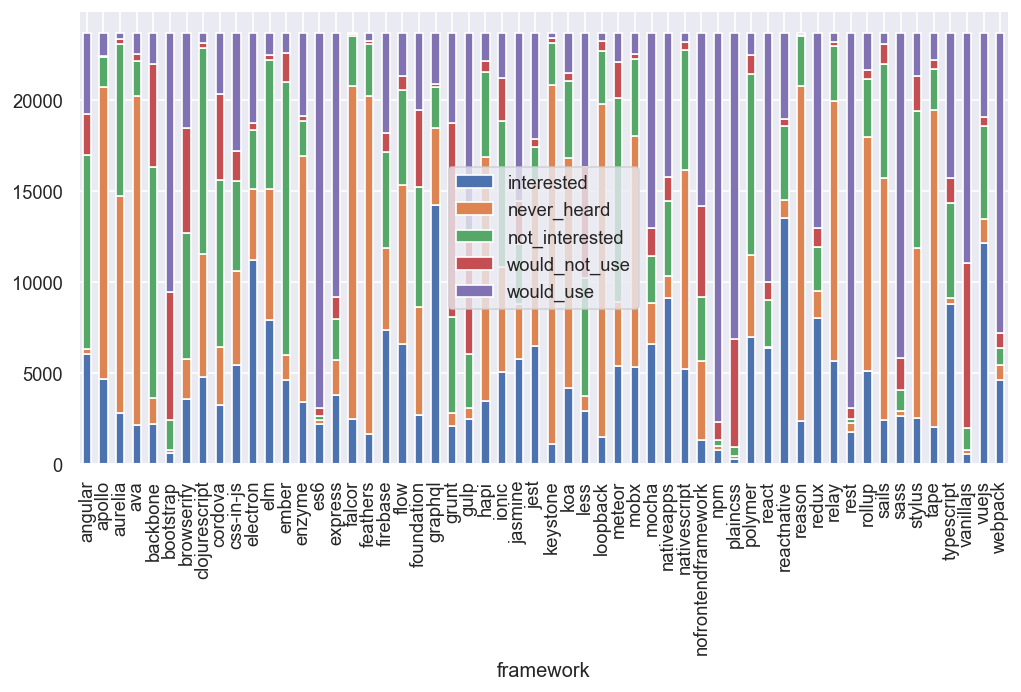

In [12]:
sbn.set()
f,ax = plt.subplots(1,1,figsize=(10,5),dpi=120)
ax = Clean_Data_Interes.set_index('framework').plot(kind='bar', stacked=True,ax=ax)
plt.show()

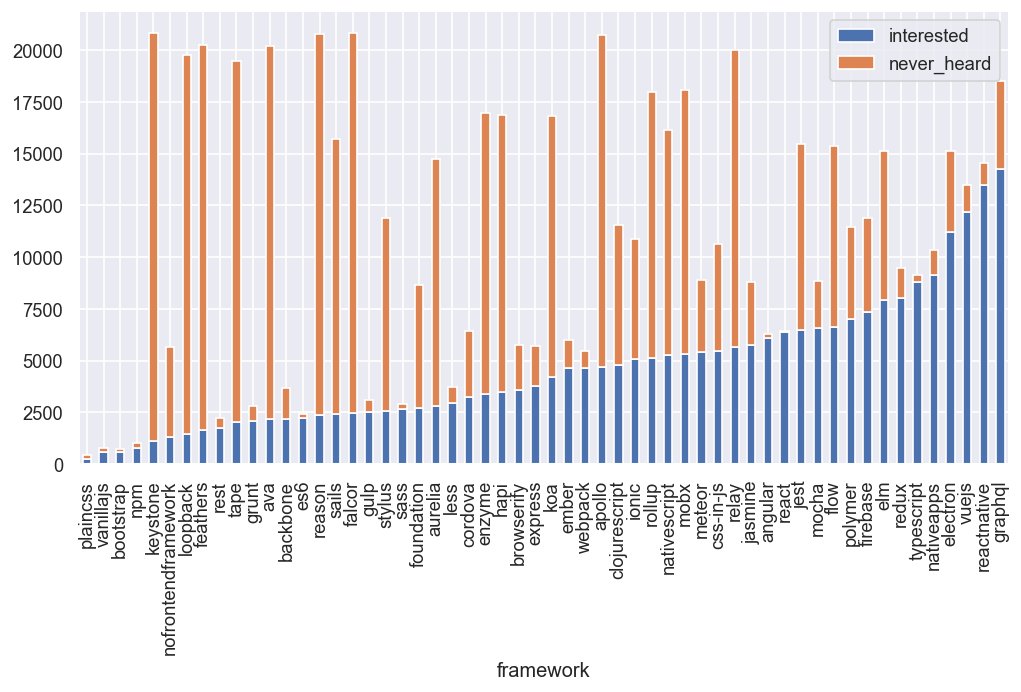

In [13]:
sbn.set()
f,ax = plt.subplots(1,1,figsize=(10,5),dpi=120)
ax = Clean_Data_Interes[['framework','interested','never_heard']].sort_values('interested').set_index('framework').plot(kind='bar',stacked=True,ax=ax)
plt.show()

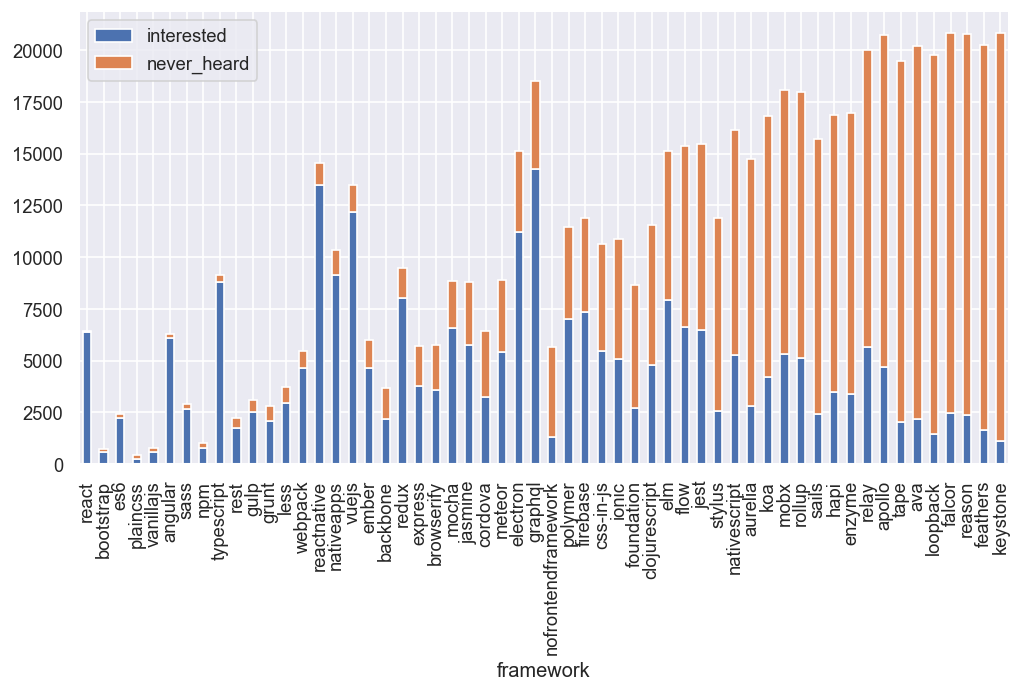

In [14]:
sbn.set()
f,ax = plt.subplots(1,1,figsize=(10,5),dpi=120)
ax = Clean_Data_Interes[['framework','interested','never_heard']].sort_values('never_heard').set_index('framework').plot(kind='bar',stacked=True,ax=ax)
plt.show()

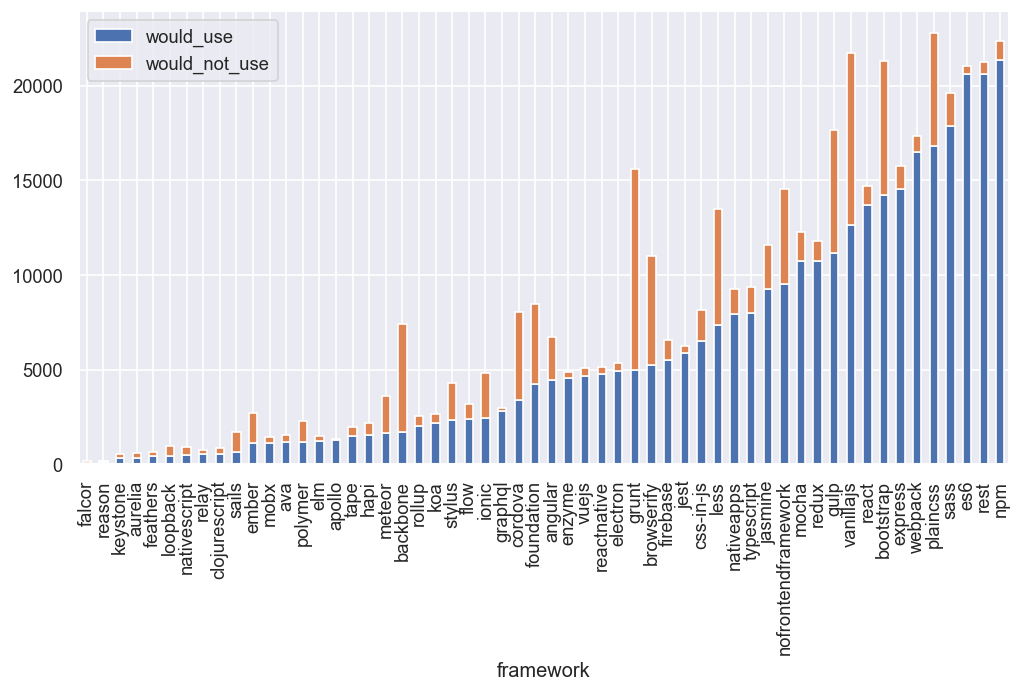

In [15]:
sbn.set()
f,ax = plt.subplots(1,1,figsize=(10,5),dpi=120)
ax = Clean_Data_Interes[['framework','would_use','would_not_use']].sort_values('would_use').set_index('framework').plot(kind='bar',stacked=True,ax=ax)
plt.show()

In [16]:
dummy = {}
for i in df.user_info:
    for j in i:
        if 'company_size' in i and 'years_of_experience' in i and 'yearly_salary' in i:
            try:
                dummy[j].append(i[j])
            except:
                dummy[j] = [i[j]]

In [17]:
Data_Info = pd.DataFrame(dummy, columns=['years_of_experience','company_size','yearly_salary','user_agent'])

In [18]:
Data_Info['user_agent'] = Data_Info['user_agent'].apply(lambda x:str(parse(x)))

In [19]:
dummy = Counter(Data_Info.years_of_experience)
YOE = {}
YOE['years_of_experience'] = []
YOE['number_of_per'] = []
for i in dummy:
    YOE['years_of_experience'].append(i)
    YOE['number_of_per'].append(dummy[i])
YOE = pd.DataFrame(YOE)

In [20]:
YOE

,years_of_experience,number_of_per
0,10_20,4771
1,2_5,6936
2,5_10,6542
3,more_than_20,1098
4,1_2,2778
5,less_than_1,817


In [21]:
YOE['class'] = np.array([5,3,4,6,2,1])

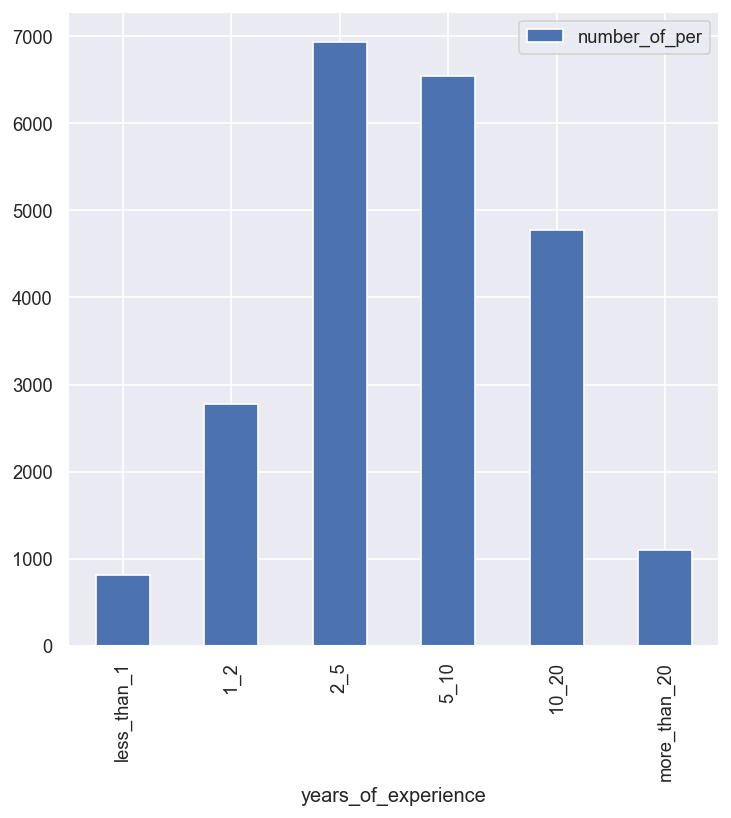

In [22]:
f,ax = plt.subplots(1,1,figsize=(7,7),dpi=120)
ax = YOE.set_index('years_of_experience').sort_values('class').plot(kind='bar',y='number_of_per',ax=ax)
plt.show()

In [23]:
dummy = Counter(Data_Info.company_size)
CZ = {}
CZ['company_size'] = []
CZ['count'] = []
for i in dummy:
    CZ['company_size'].append(i)
    CZ['count'].append(dummy[i])
CZ = pd.DataFrame(CZ)

In [25]:
CZ

,company_size,count
0,10_20,2289
1,5_10,2005
2,1,2742
3,1_5,2301
4,more_than_1000,3663
5,100_1000,4404
6,50_100,2520
7,20_50,3018


In [26]:
CZ['class'] = np.array([4,3,1,2,8,7,6,5])

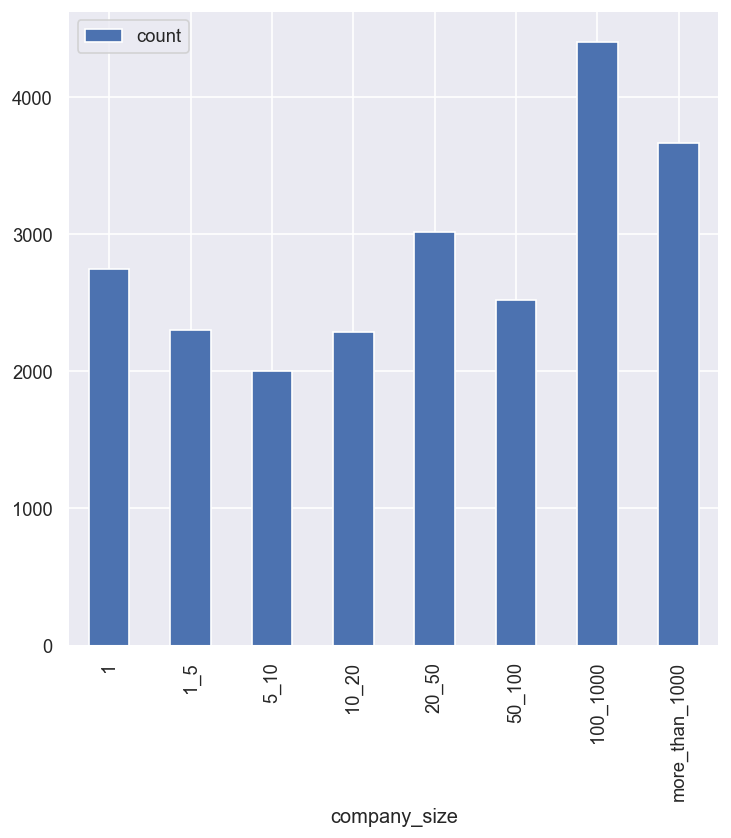

In [27]:
f,ax = plt.subplots(1,1,figsize=(7,7),dpi=120)
ax = CZ.set_index('company_size').sort_values('class').plot(kind='bar',y='count',ax=ax)
plt.show()

In [28]:
dummy = Counter(Data_Info.yearly_salary)
YS = {}
YS['yearly_salary'] = []
YS['count'] = []
for i in dummy:
    YS['yearly_salary'].append(i)
    YS['count'].append(dummy[i])
YS = pd.DataFrame(YS)

In [29]:
YS

,yearly_salary,count
0,50_100,7228
1,30_50,3997
2,work_for_free,1752
3,0_10,1626
4,100_200,4605
5,10_30,3333
6,more_than_200,401


In [30]:
YS['class'] = np.array([5,4,1,2,6,3,7])

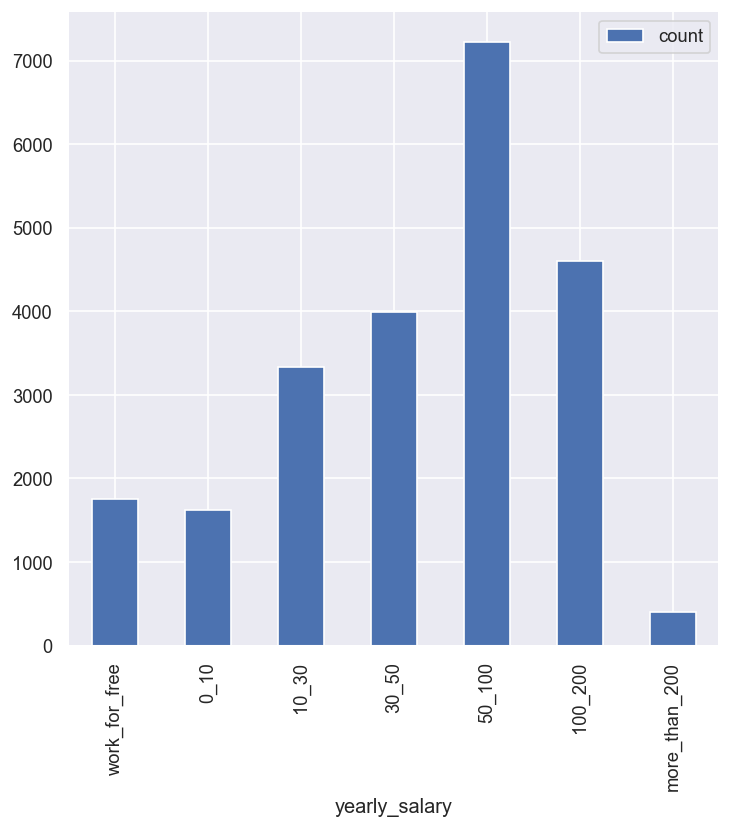

In [31]:
f,ax = plt.subplots(1,1,figsize=(7,7),dpi=120)
ax = YS.set_index('yearly_salary').sort_values('class').plot(kind='bar',y='count',ax=ax)
plt.show()

In [32]:
Data_Info['Class_YOE'] = Data_Info['years_of_experience']
Data_Info['Class_YS'] = Data_Info['yearly_salary']
Data_Info['Class_CZ'] = Data_Info['company_size']

In [33]:
def detDict(DF,column):
    Dict = {}
    for i,j in zip(DF[column],DF['class']):
        Dict[i] = j-1
    return Dict

In [34]:
Data_Info['Class_YOE'] = Data_Info['Class_YOE'].replace(detDict(YOE,'years_of_experience'))
Data_Info['Class_YS'] = Data_Info['Class_YS'].replace(detDict(YS,'yearly_salary'))
Data_Info['Class_CZ'] = Data_Info['Class_CZ'].replace(detDict(CZ,'company_size'))

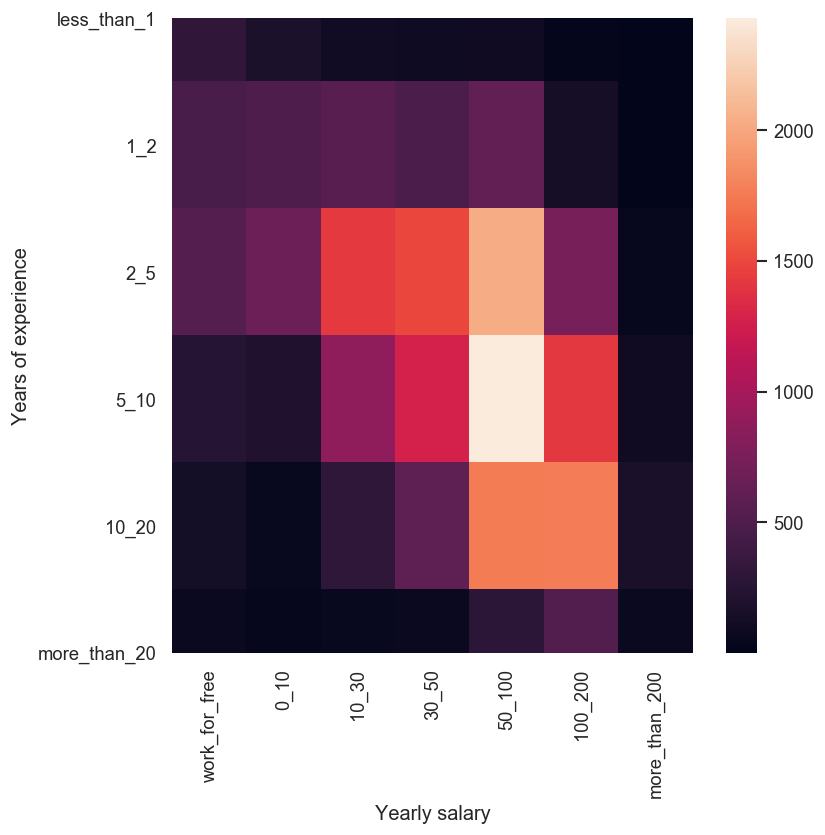

In [35]:
htmap_CYOE_CYS = np.zeros((len(YOE),len(YS)))
for i,j in zip(Data_Info['Class_YOE'],Data_Info['Class_YS']):
    htmap_CYOE_CYS[i,j] += 1
f,ax = plt.subplots(1,1,figsize=(7,7),dpi=120)
ax = sbn.heatmap(htmap_CYOE_CYS,ax=ax,\
                 xticklabels=YS.sort_values('class')['yearly_salary'],\
                yticklabels=YOE.sort_values('class')['years_of_experience'])
ax.tick_params(axis = 'y', rotation = 0)
ax.set_xlabel('Yearly salary')
ax.set_ylabel('Years of experience')
plt.show()

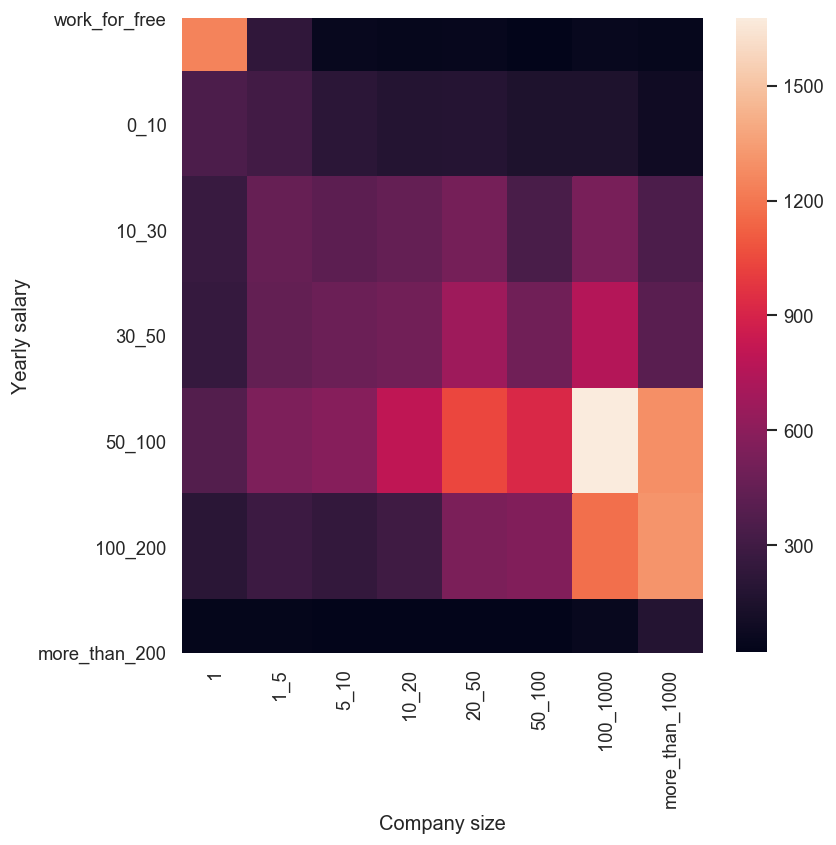

In [36]:
htmap_CZ_CYS = np.zeros((len(YS),len(CZ)))
for i,j in zip(Data_Info['Class_YS'],Data_Info['Class_CZ']):
    htmap_CZ_CYS[i,j] += 1
    
f,ax = plt.subplots(1,1,figsize=(7,7),dpi=120)
ax = sbn.heatmap(htmap_CZ_CYS,ax=ax,\
                 xticklabels=CZ.sort_values('class')['company_size'],\
                yticklabels=YS.sort_values('class')['yearly_salary'])
ax.tick_params(axis = 'y', rotation = 0)
ax.set_ylabel('Yearly salary')
ax.set_xlabel('Company size')
plt.show()

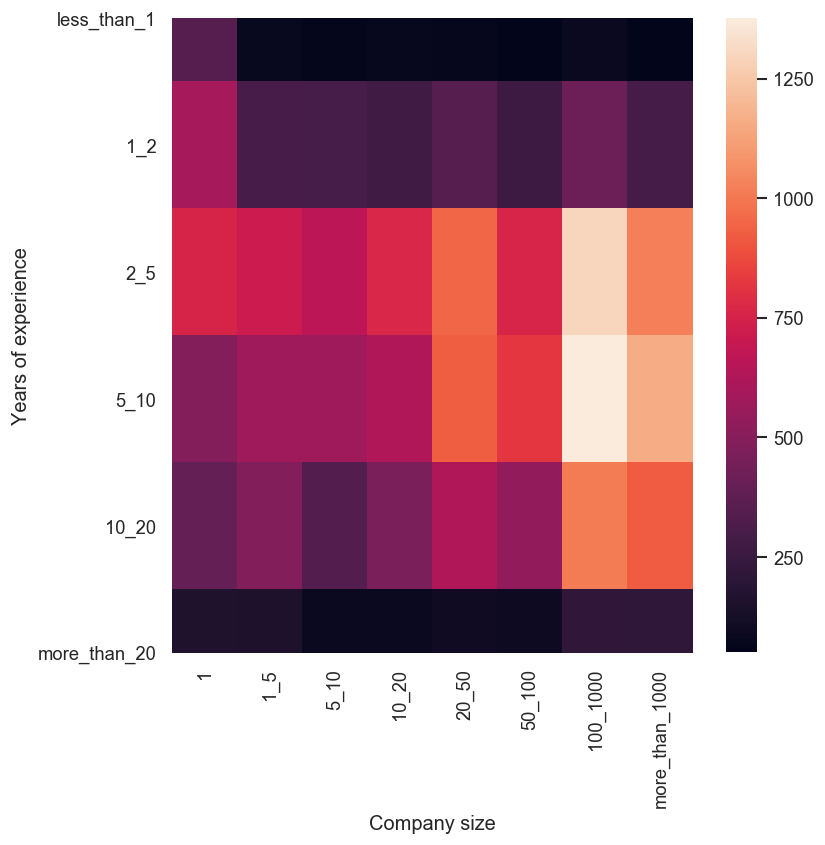

In [37]:
htmap_CZ_CYOE = np.zeros((len(YOE),len(CZ)))
for i,j in zip(Data_Info['Class_YOE'],Data_Info['Class_CZ']):
    htmap_CZ_CYOE[i,j] += 1

f,ax = plt.subplots(1,1,figsize=(7,7),dpi=120)
ax = sbn.heatmap(htmap_CZ_CYOE,ax=ax,\
                 xticklabels=CZ.sort_values('class')['company_size'],\
                yticklabels=YOE.sort_values('class')['years_of_experience'])
ax.tick_params(axis = 'y', rotation = 0)
ax.set_xlabel('Company size')
ax.set_ylabel('Years of experience')
plt.show()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x16adee810>],
      dtype=object)

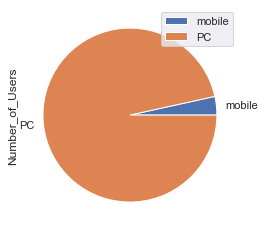

In [38]:
dummy = {}
for i in Data_Info.user_agent.apply(lambda x: x.split('/')):
    try:
        dummy[i[0].replace(' ','')] +=1
    except:
        dummy[i[0].replace(' ','')] = 1

dum = {}
for i in dummy:
    if i == 'PC':
        pass
    else:
        try:
            dum['mobile'] += 1
        except:
            dum['mobile'] = 1
        
dum['PC'] = dummy['PC']

dummy = {}
dummy['dispositive'] = []
dummy['Number_of_Users'] = []
for i in dum:
    dummy['dispositive'].append(i)
    dummy['Number_of_Users'].append(dum[i])

Data_Disp = pd.DataFrame(dummy)
Data_Disp.set_index('dispositive').plot(kind='pie',subplots=True)

In [39]:
dummy = {}
for i in Data_Info.user_agent.apply(lambda x: x.split('/')):
    try:
        dummy[i[1].replace(' ','')[:6]] +=1
    except:
        dummy[i[1].replace(' ','')[:6]] = 1
        
dum = {}
for i in dummy:
    if 'iOS' in i:
        try:
            dum['iOS'] += dummy[i]
        except:
            dum['iOS'] = dummy[i]
    else:
        dum[i] = dummy[i]

dummy={}
dummy['OS'] = []
dummy['Number_of_Users'] = []
dummy['Mobile'] = []
for i in dum:
    if 'Andro' in i or 'iOS' in i:
        dummy['Mobile'].append(1)
    else:
        dummy['Mobile'].append(0)
    dummy['OS'].append(i)
    dummy['Number_of_Users'].append(dum[i])

Data_OS = pd.DataFrame(dummy)

In [43]:
Data_OS['Open_Source'] = [1,0,0,1,1,1,0,1,1,1,1,1]

In [45]:
Data_OS['Open_Source'] = Data_OS['Open_Source'].replace({0:'Non OSS',1:'OSS'})

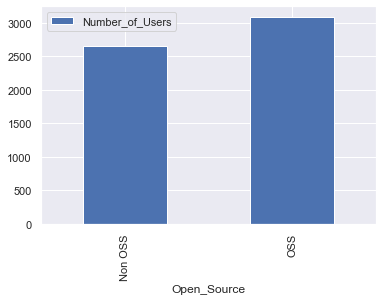

In [46]:
Data_OS[Data_OS.Mobile==1].groupby(by='Open_Source').agg({'Number_of_Users':'sum'}).plot(kind='bar',y='Number_of_Users')

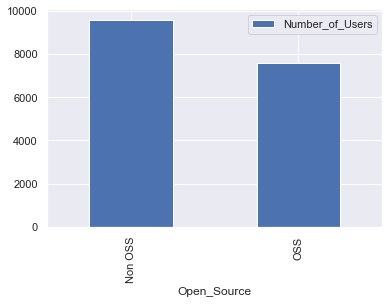

In [47]:
Data_OS[Data_OS.Mobile==0].groupby(by='Open_Source').agg({'Number_of_Users':'sum'}).plot(kind='bar',y='Number_of_Users')

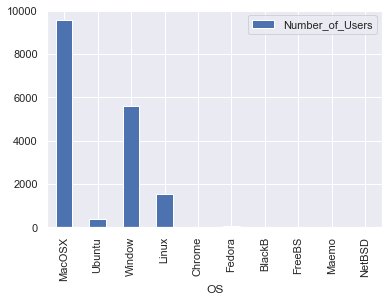

In [48]:
Data_OS[Data_OS.Mobile==0].set_index('OS').plot(kind='bar',y='Number_of_Users')

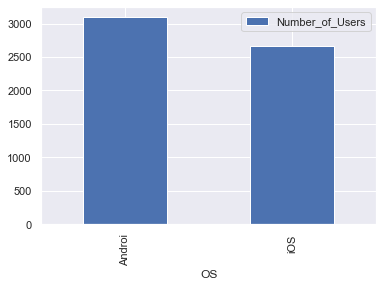

In [50]:
Data_OS[Data_OS.Mobile==1].set_index('OS').plot(kind='bar',y='Number_of_Users')

# Now let's work on FEND

In [52]:
dummy = {}
for i in df[df.sections_other_tools != {}].sections_other_tools:
    for j in i:
        try:
            dummy[j] = dummy[j]+i[j]
        except:
            dummy[j] = i[j]

fw_dicts = {}
for i in dummy.keys():
    dum = {}
    dum['framework'] = []
    dum['Count'] = []
    for j,k in Counter(dummy[i]).items():
        dum['framework'].append(j)
        dum['Count'].append(k)
    fw_dicts[i] = pd.DataFrame(dum)
    
for i in fw_dicts:
    fw_dicts[i] = fw_dicts[i].sort_values('Count',ascending=False)

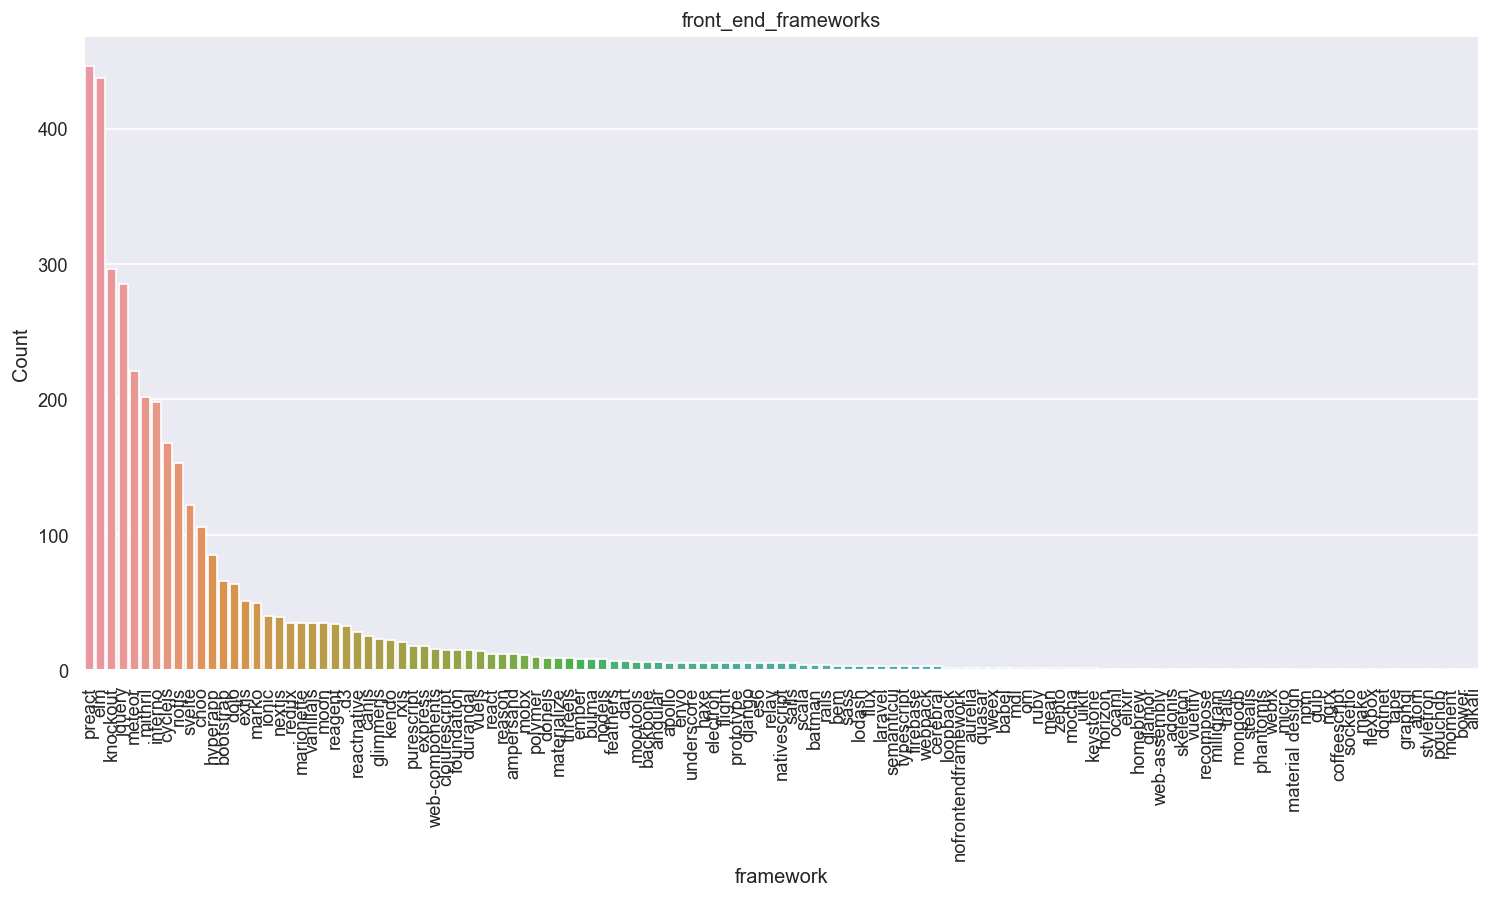

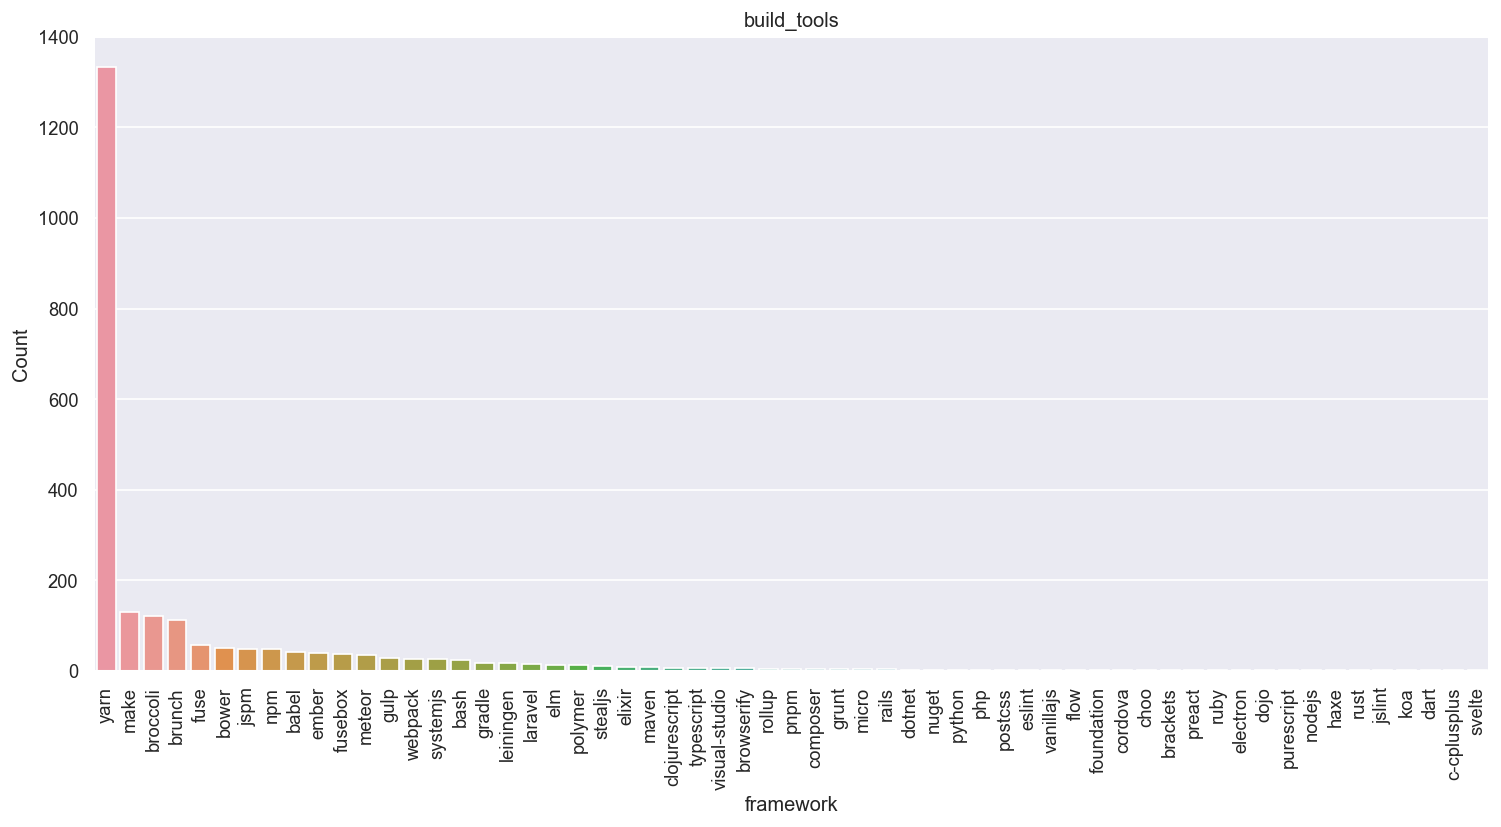

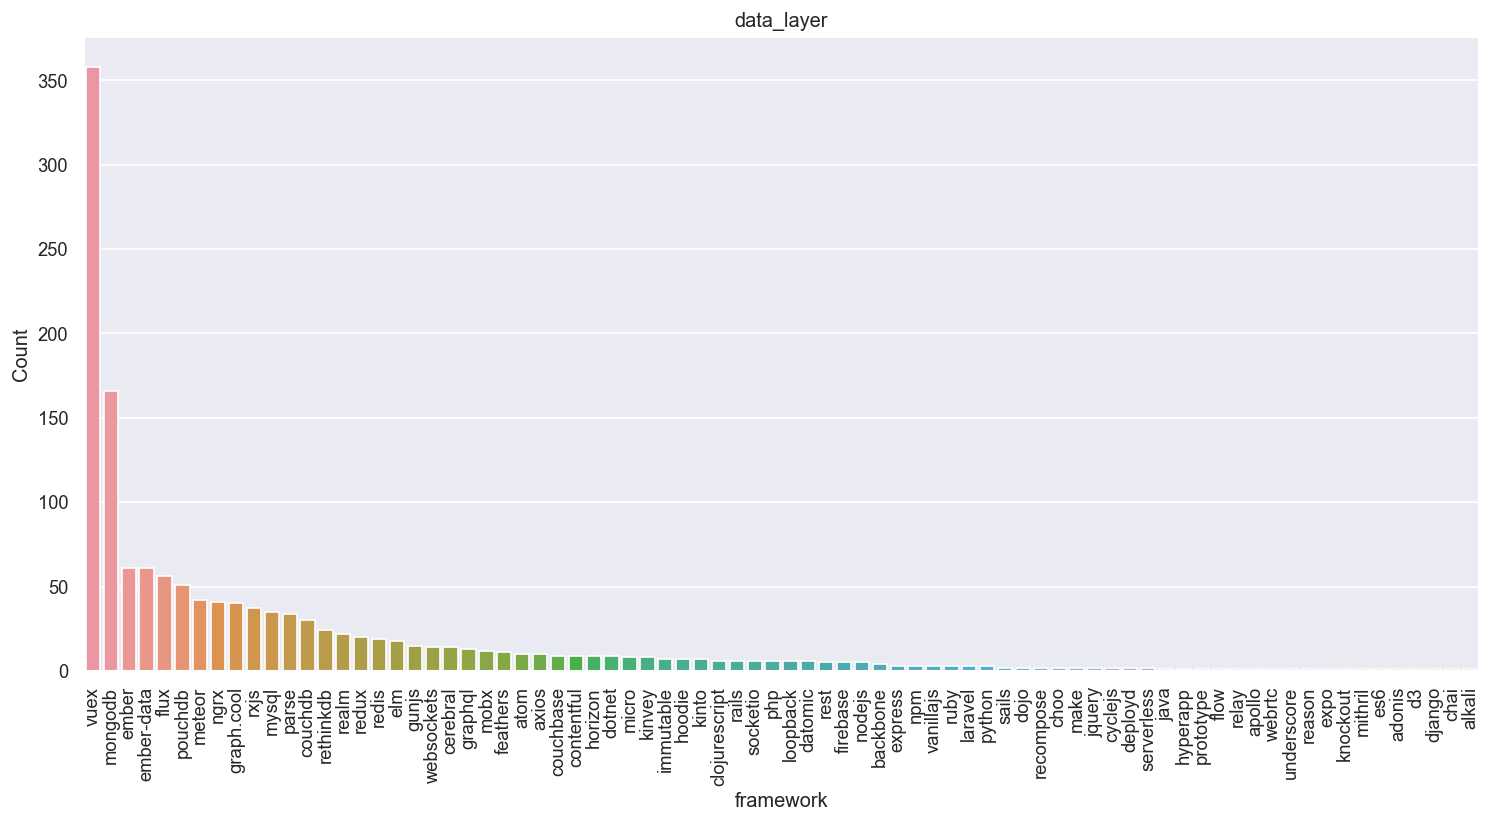

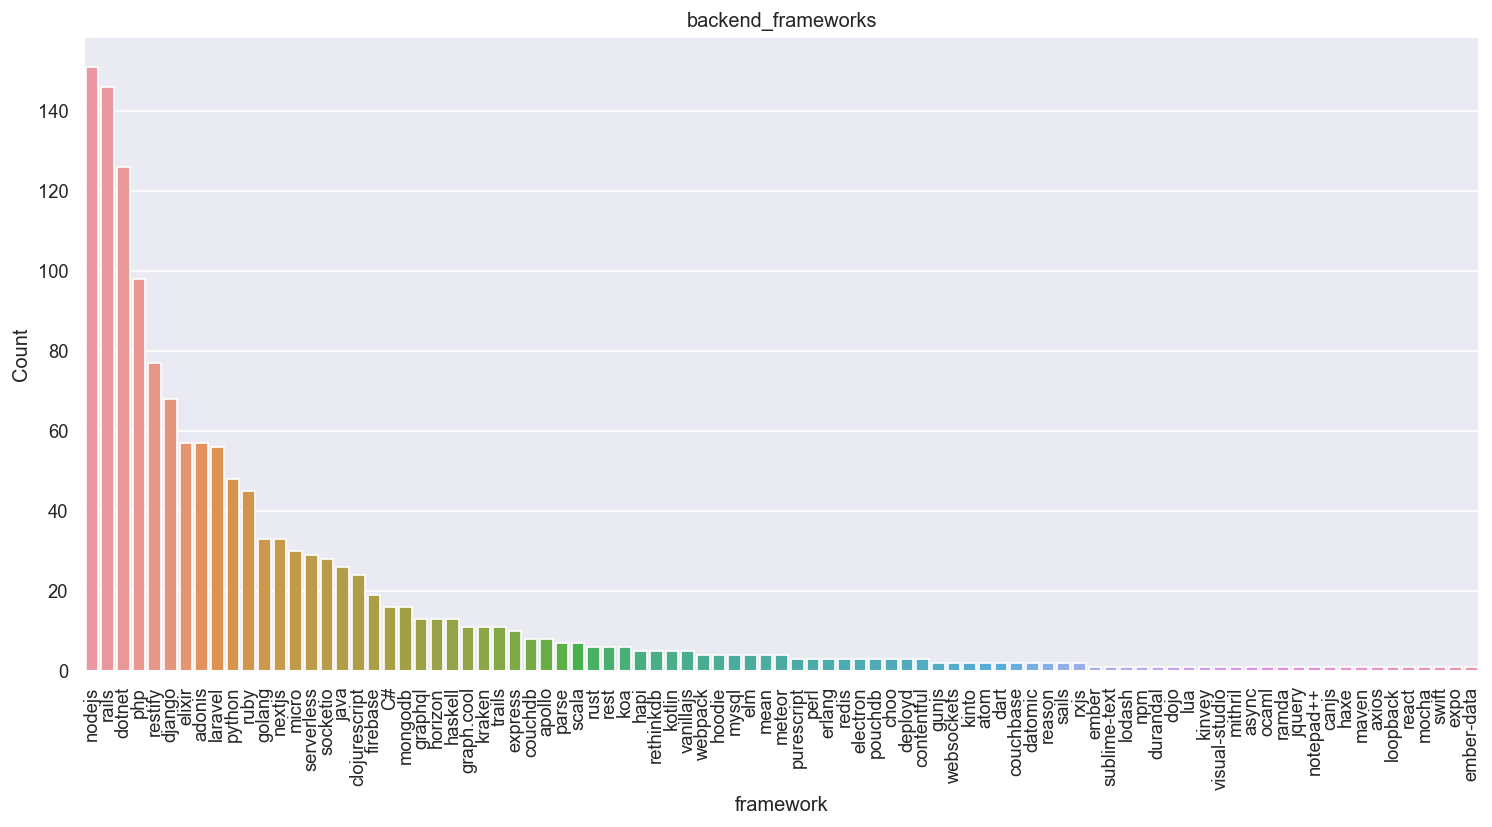

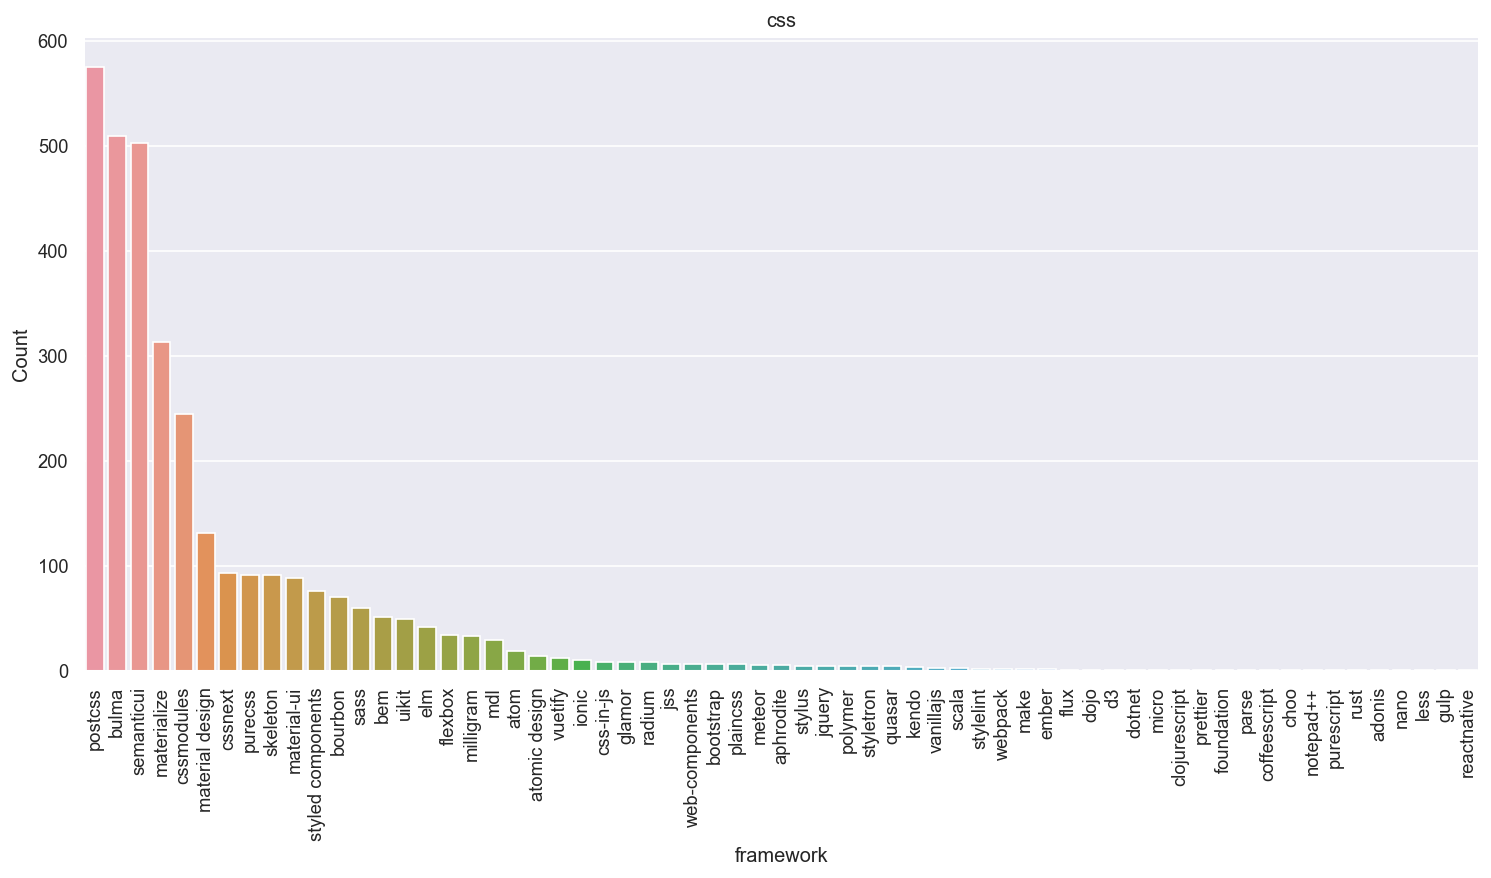

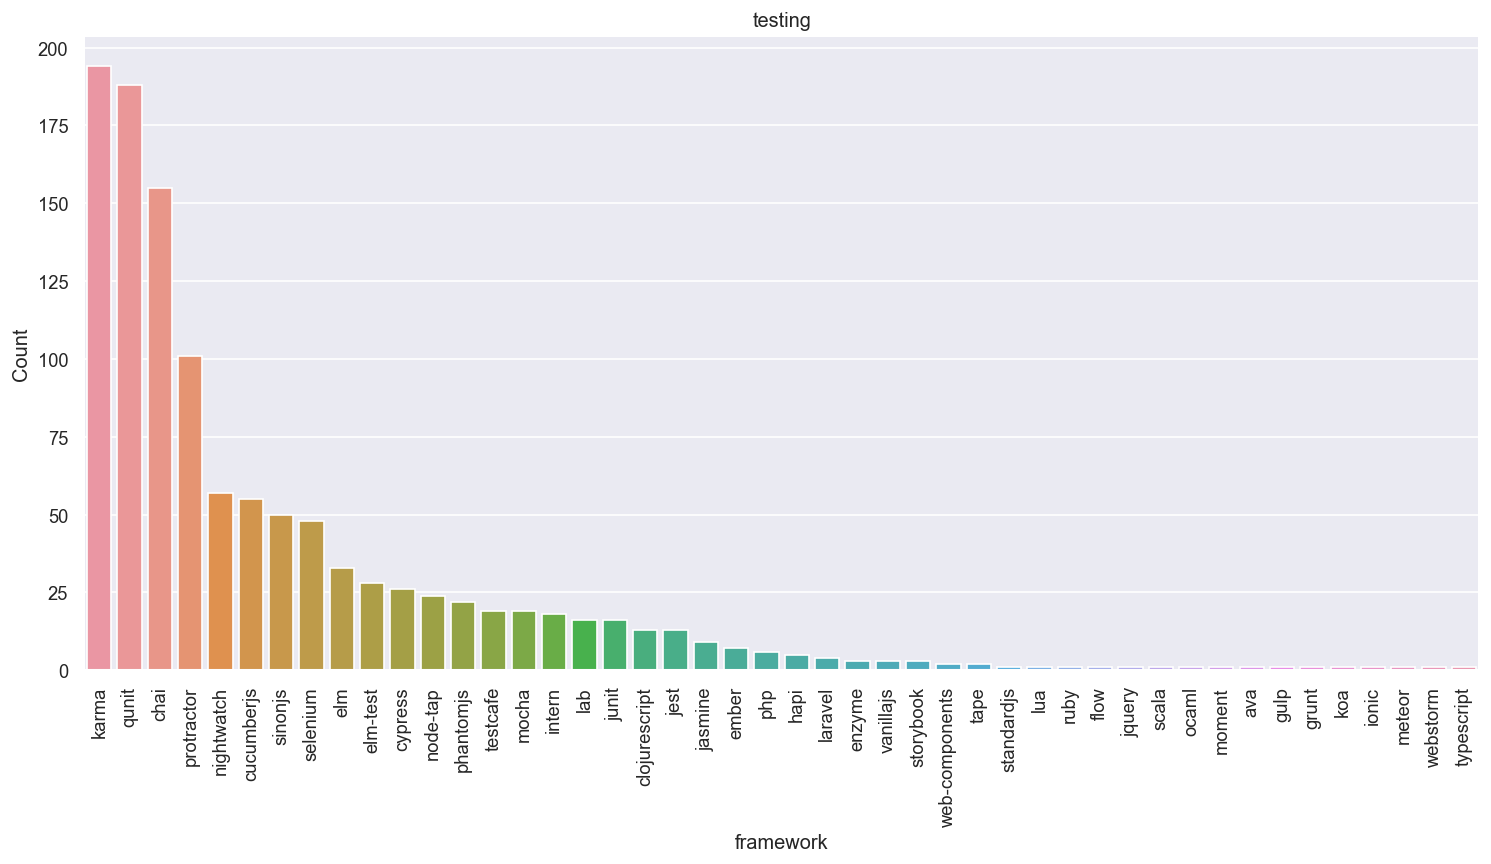

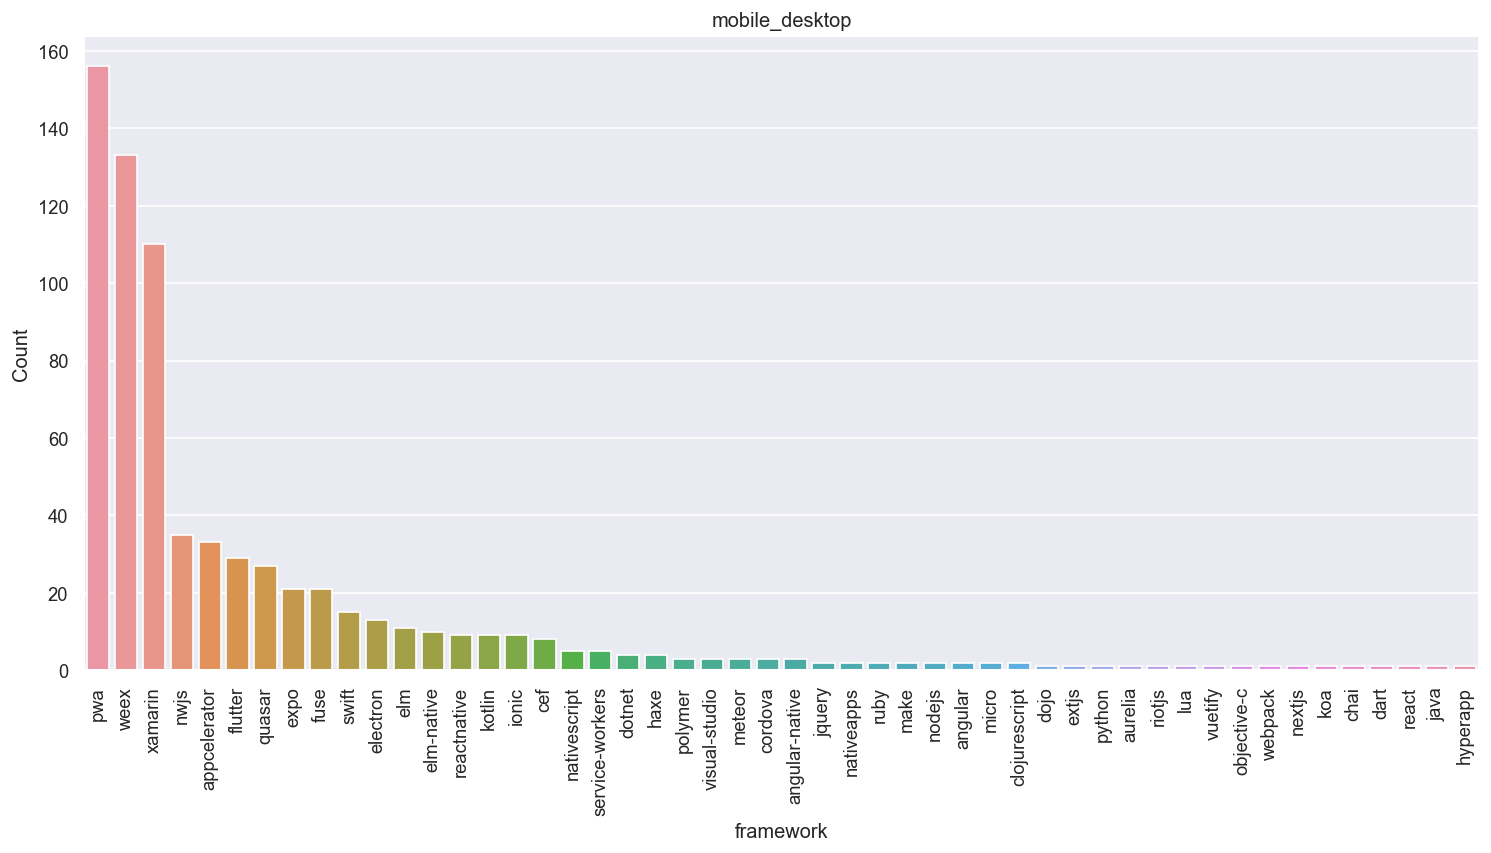

In [55]:
for i in fw_dicts.keys():
    f,ax = plt.subplots(1,1,figsize=(15,7),dpi=120)
    ax = sbn.barplot(x='framework',y='Count',data=fw_dicts[i])
    ax.tick_params(axis = 'x', rotation = 90)
    ax.set_title(i)
    plt.show()

# Happines

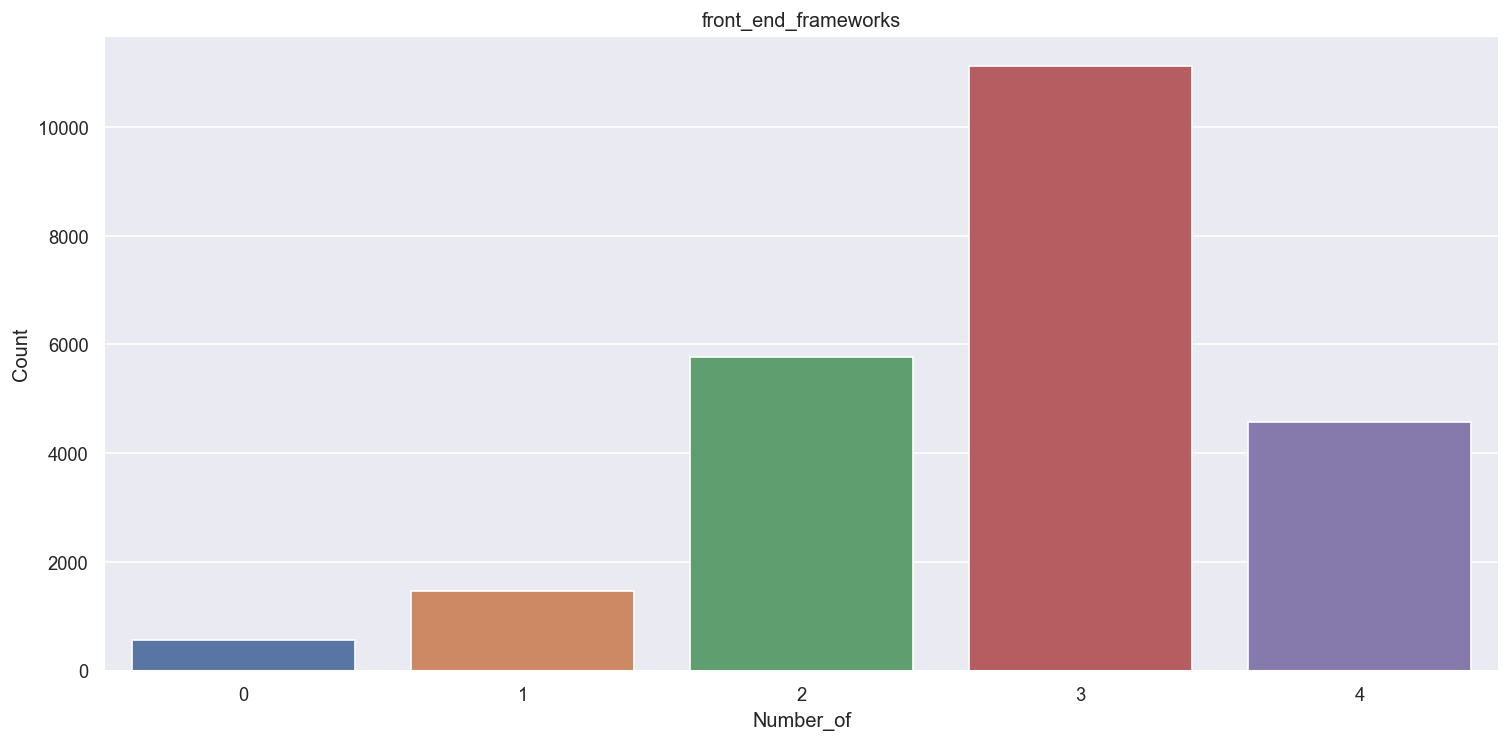

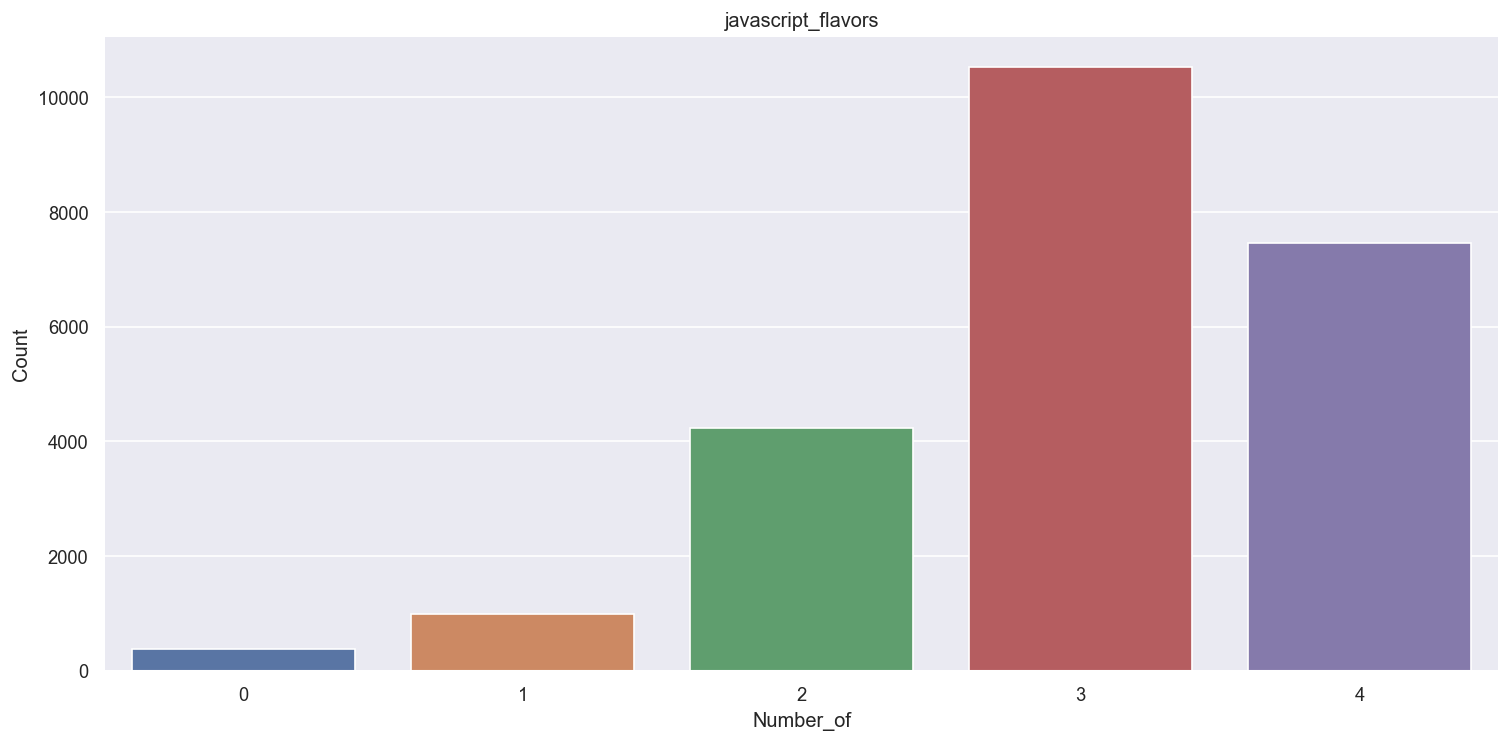

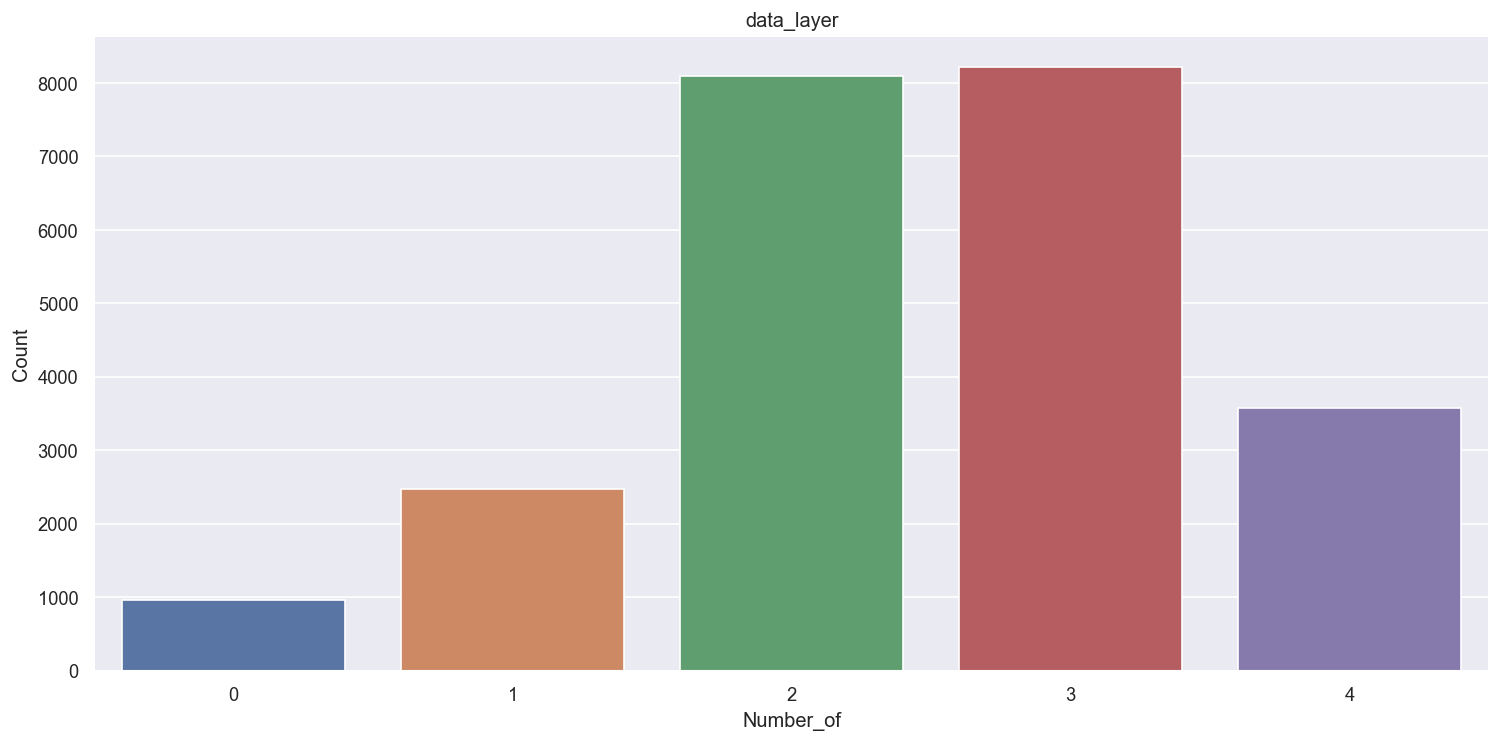

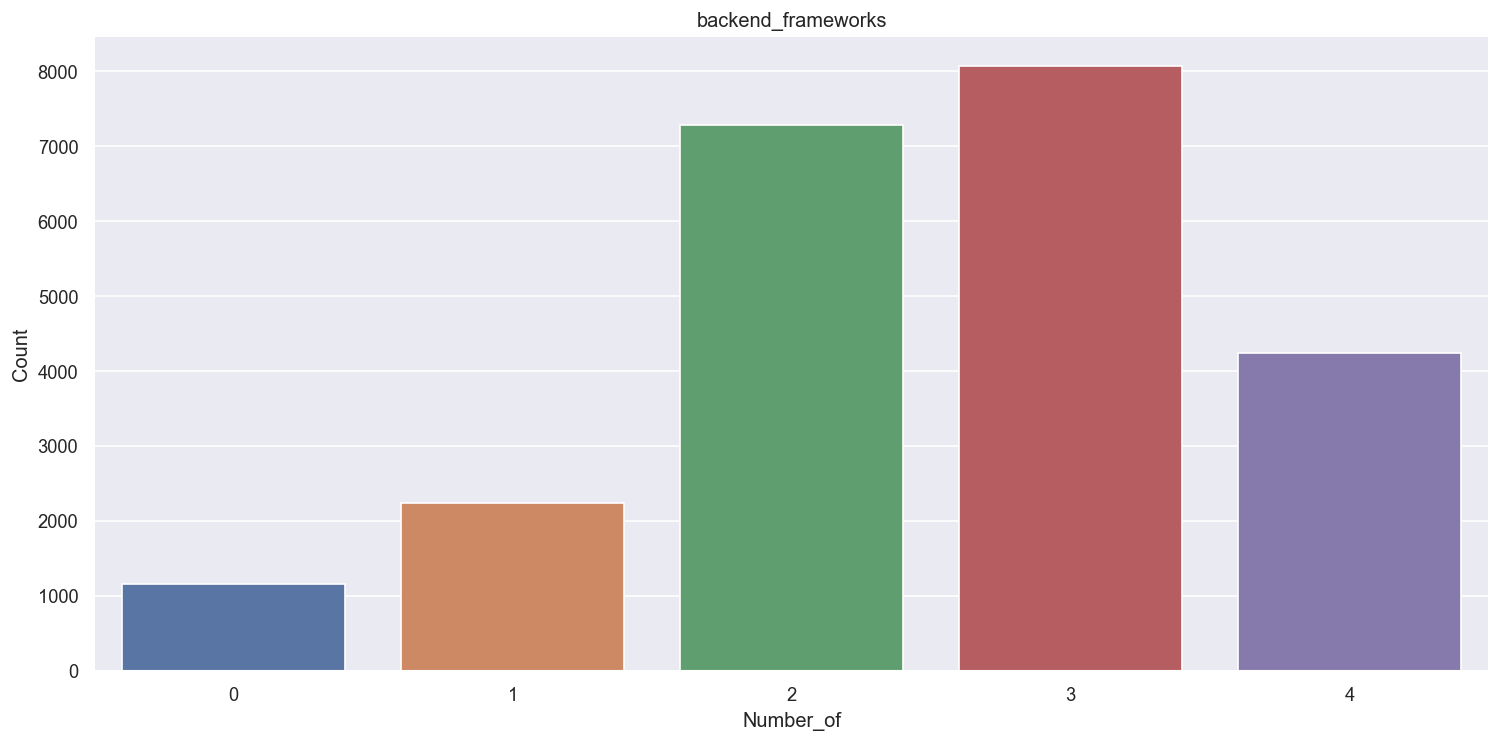

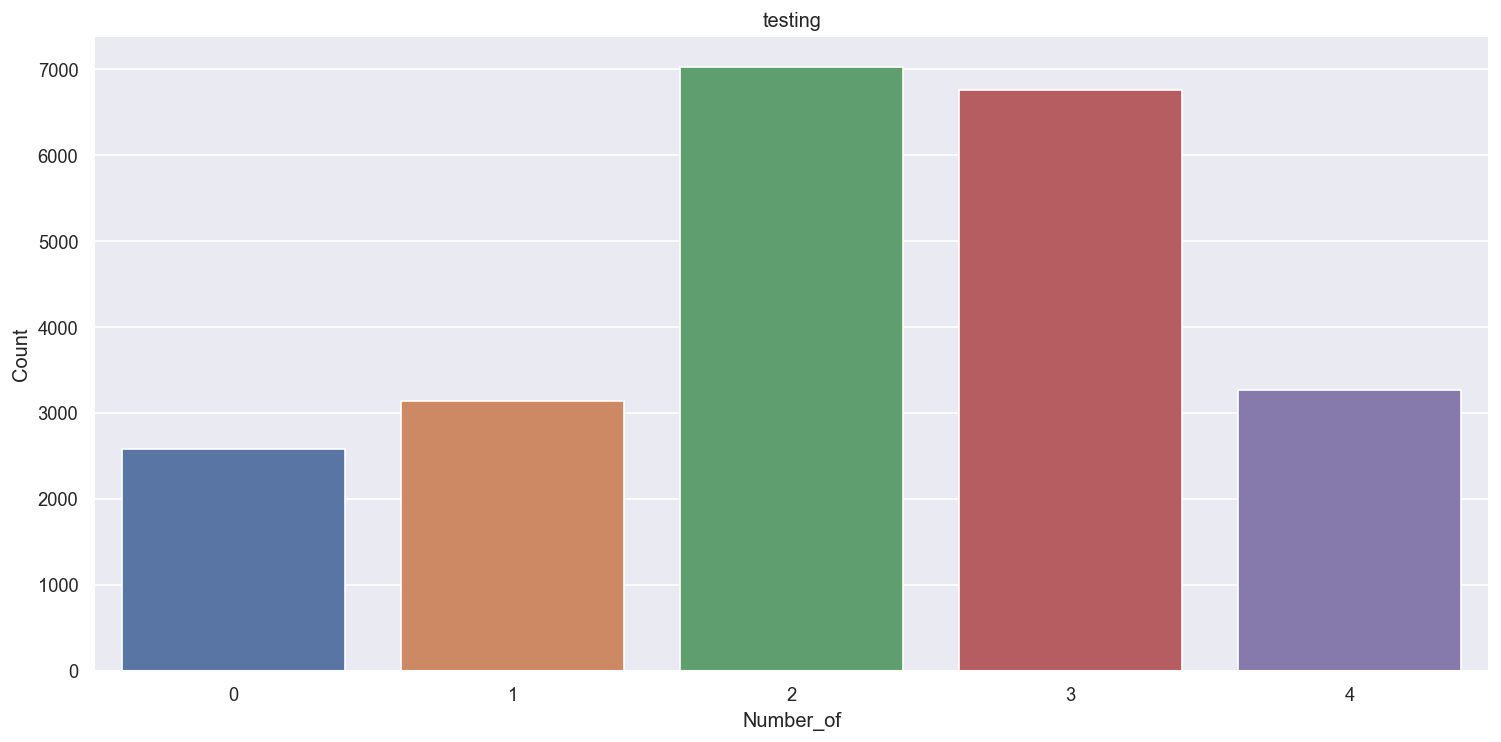

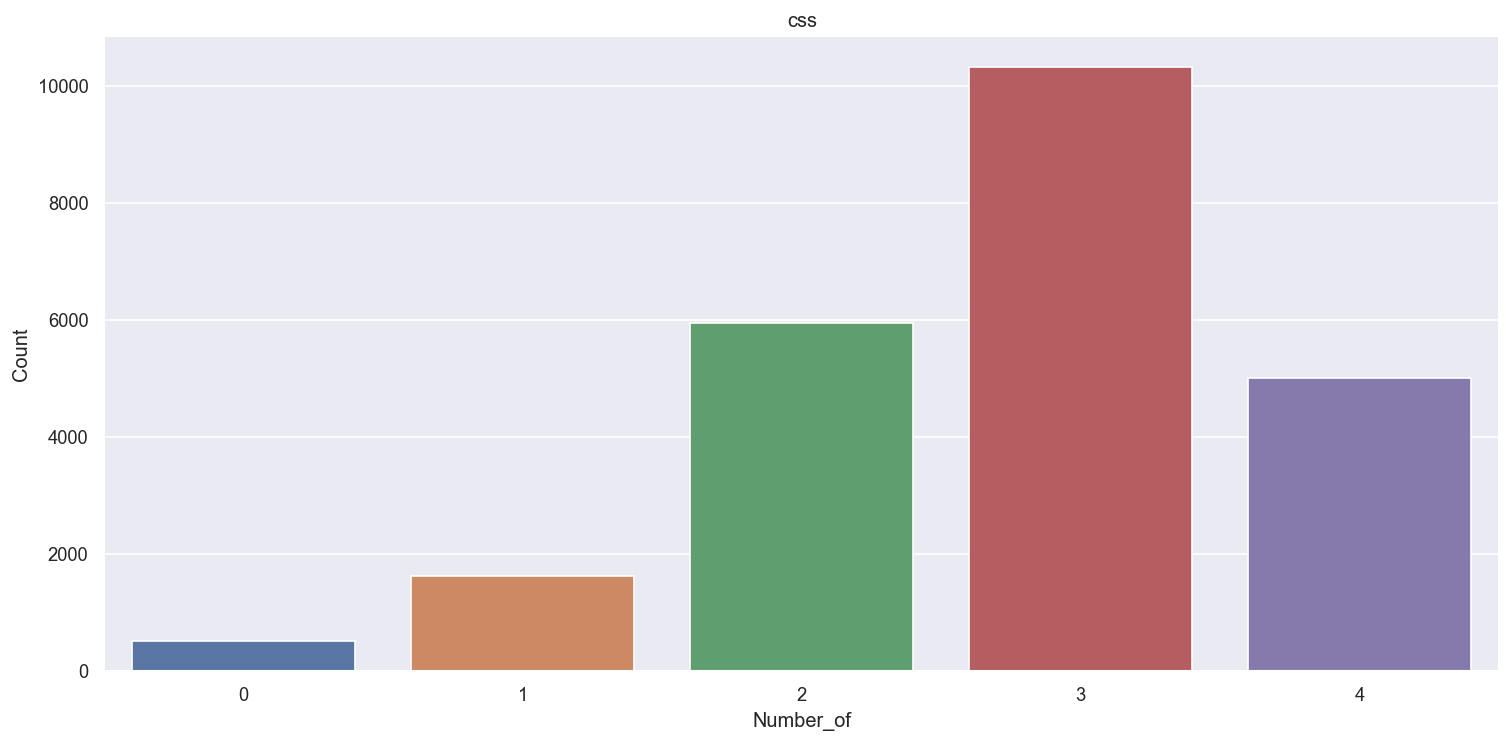

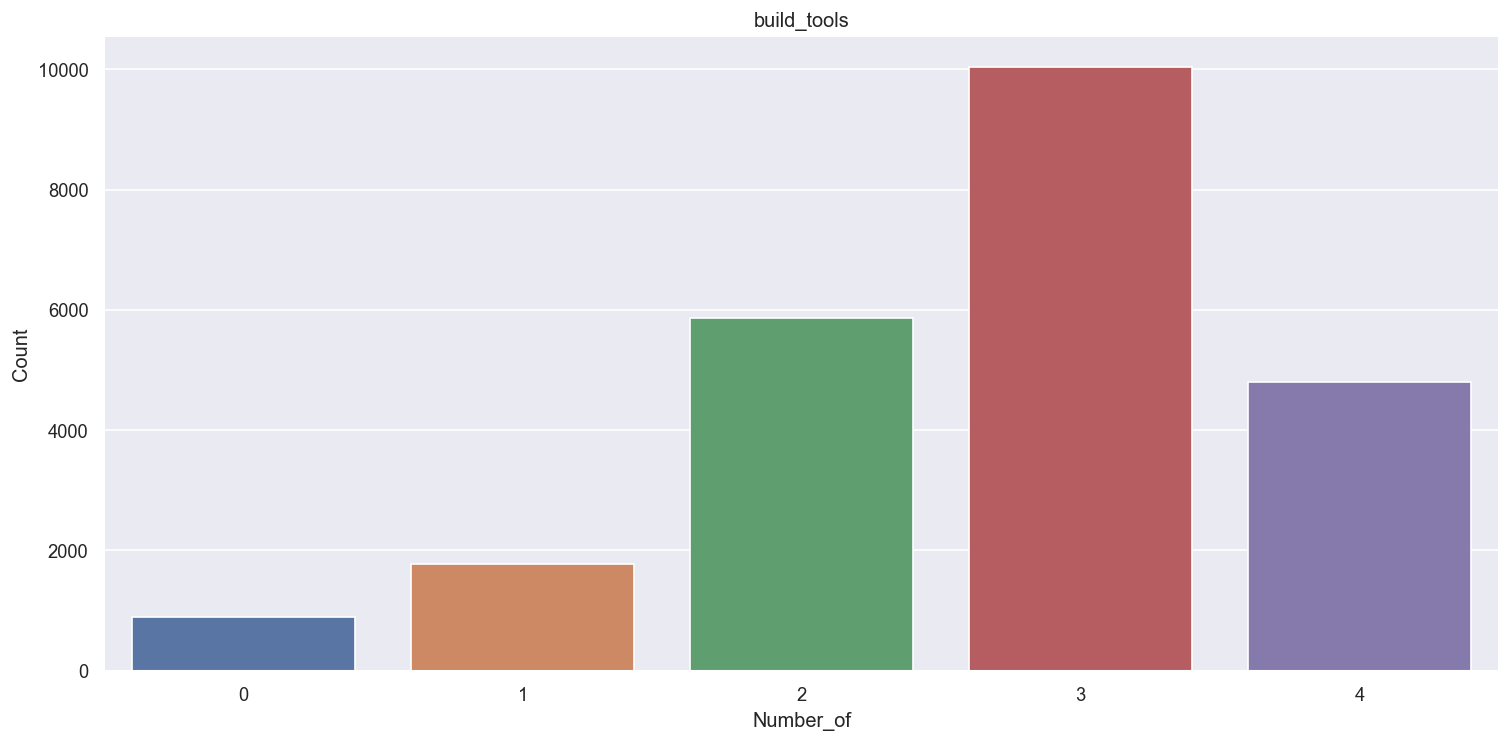

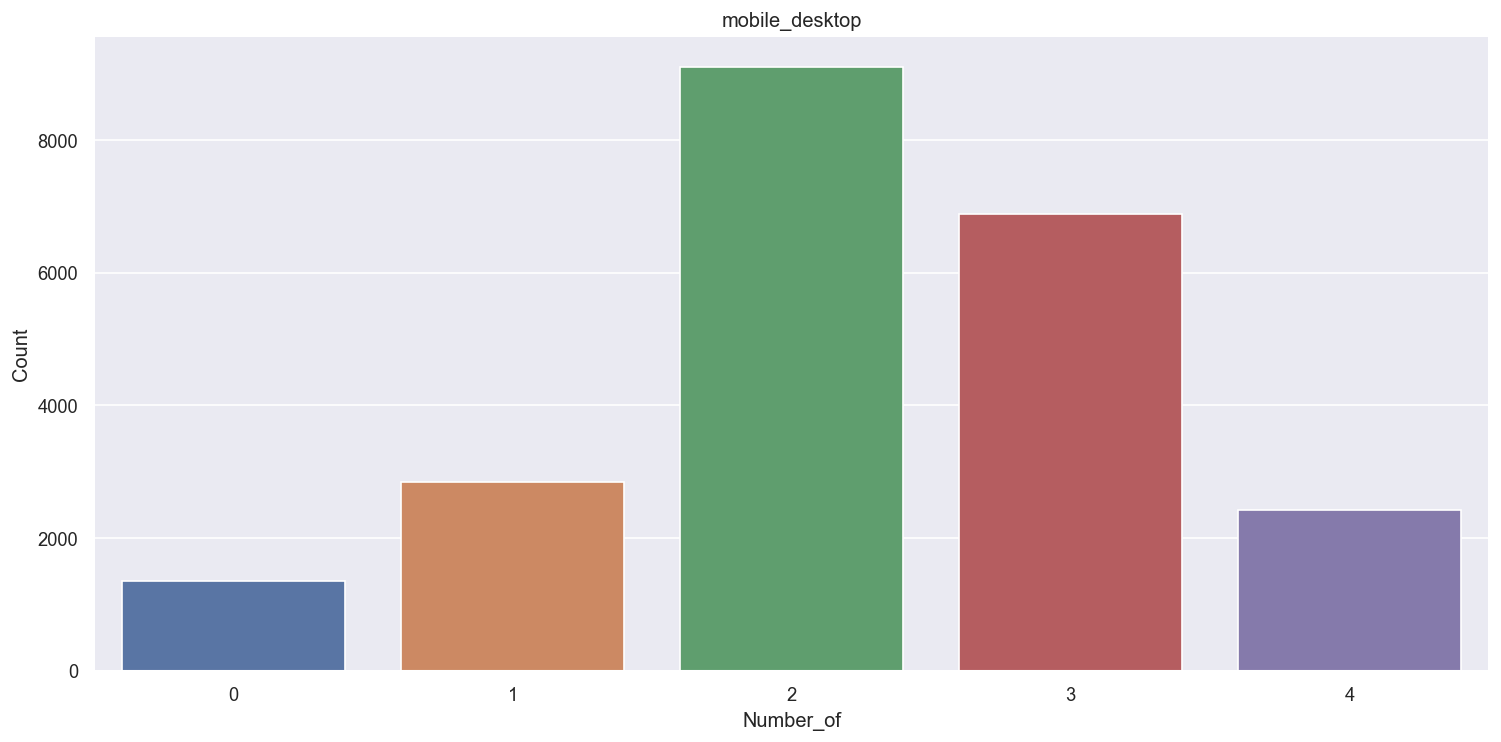

In [57]:
dummy = {}
for i in df.happiness:
    for j in i:
        try:
            dummy[j].append(i[j])
        except:
            dummy[j] = [i[j]]

dum = {}
for i in dummy:
    dum[i] = {}
    dum[i]['Number_of'] = []
    dum[i]['Count'] = []
    for j,k in Counter(dummy[i]).items():
            dum[i]['Number_of'].append(j)
            dum[i]['Count'].append(k)
    dum[i] = pd.DataFrame(dum[i])
    
Count_Happines = dum
    
for i in Count_Happines.keys():
    f,ax = plt.subplots(1,1,figsize=(15,7),dpi=120)
    ax = sbn.barplot(x='Number_of',y='Count',data=Count_Happines[i])
    ax.tick_params(axis = 'x', rotation = 0)
    ax.set_title(i)
    plt.show()

# Opinions

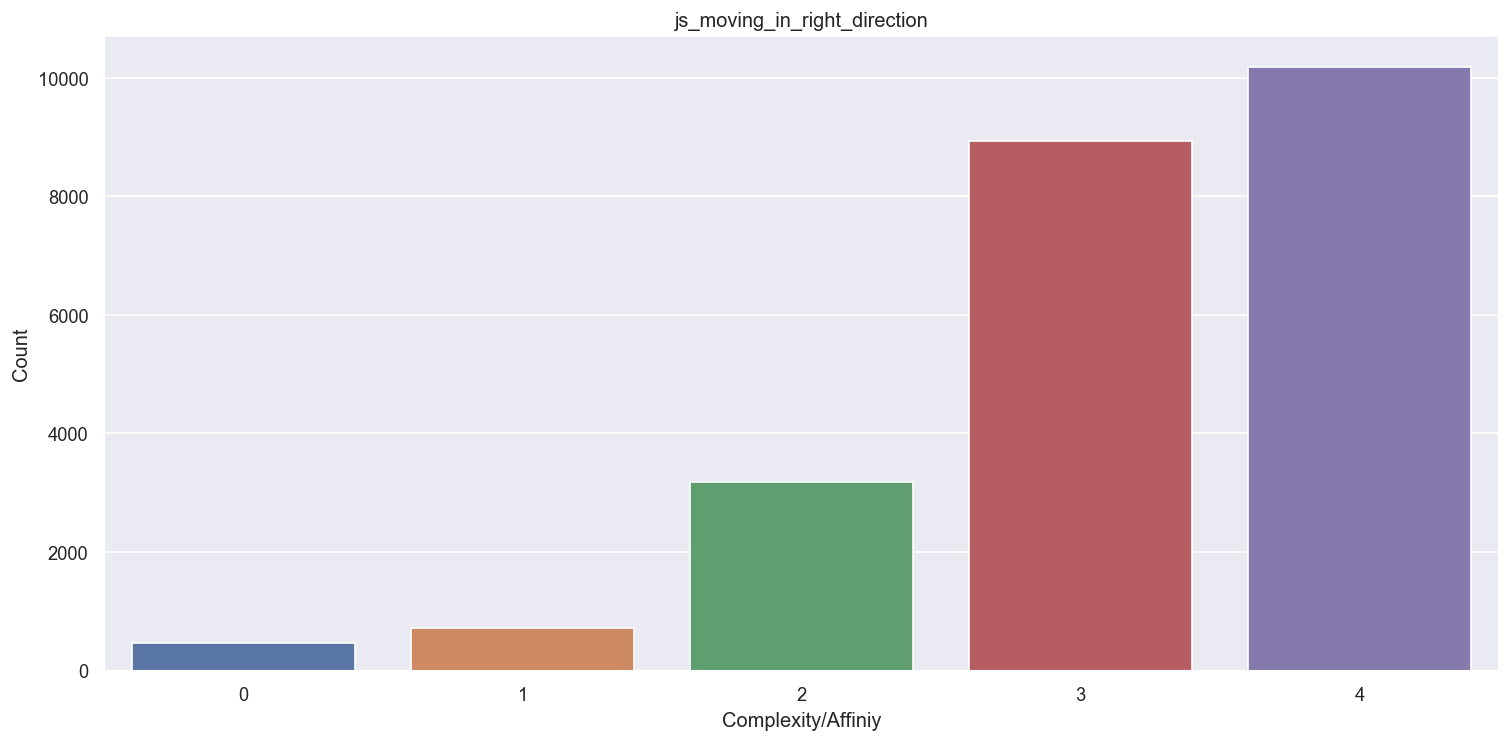

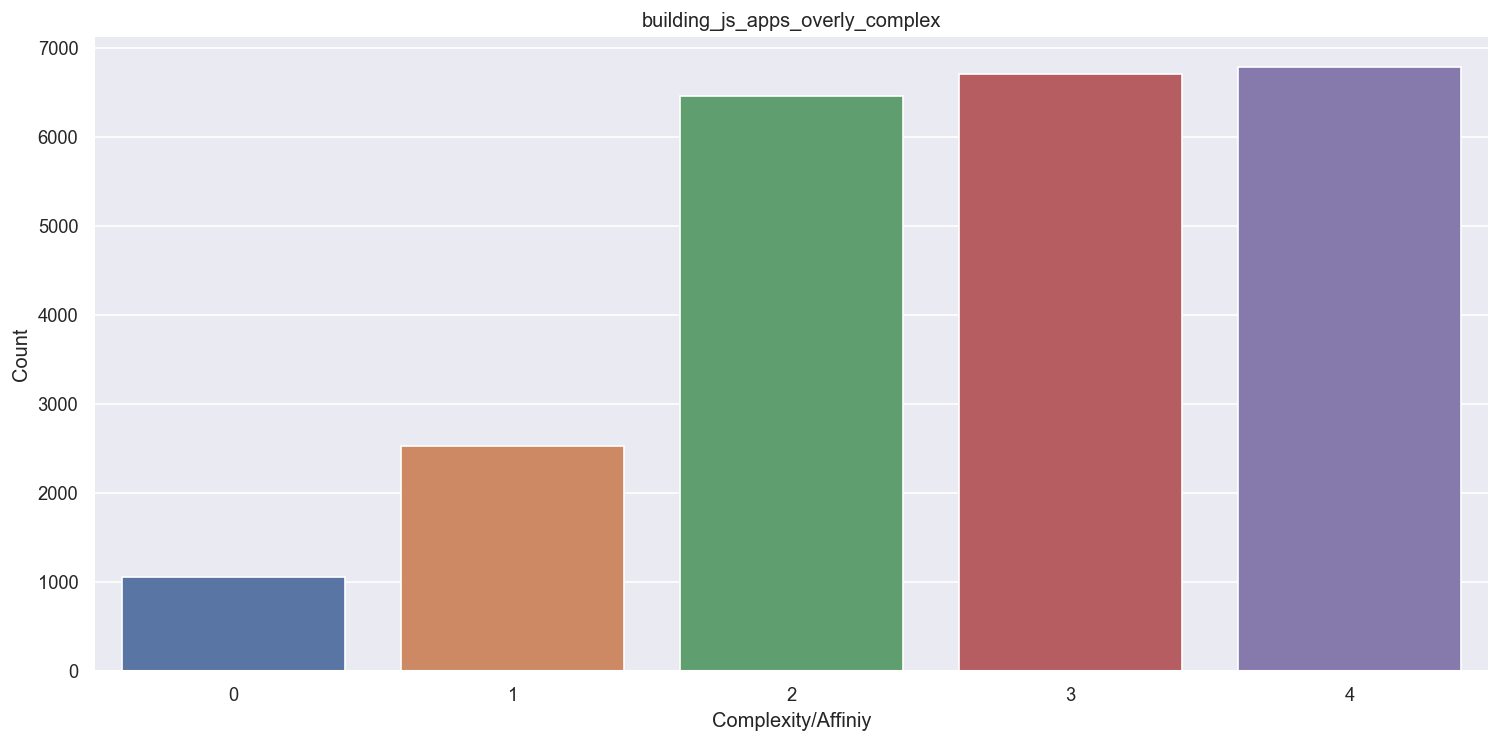

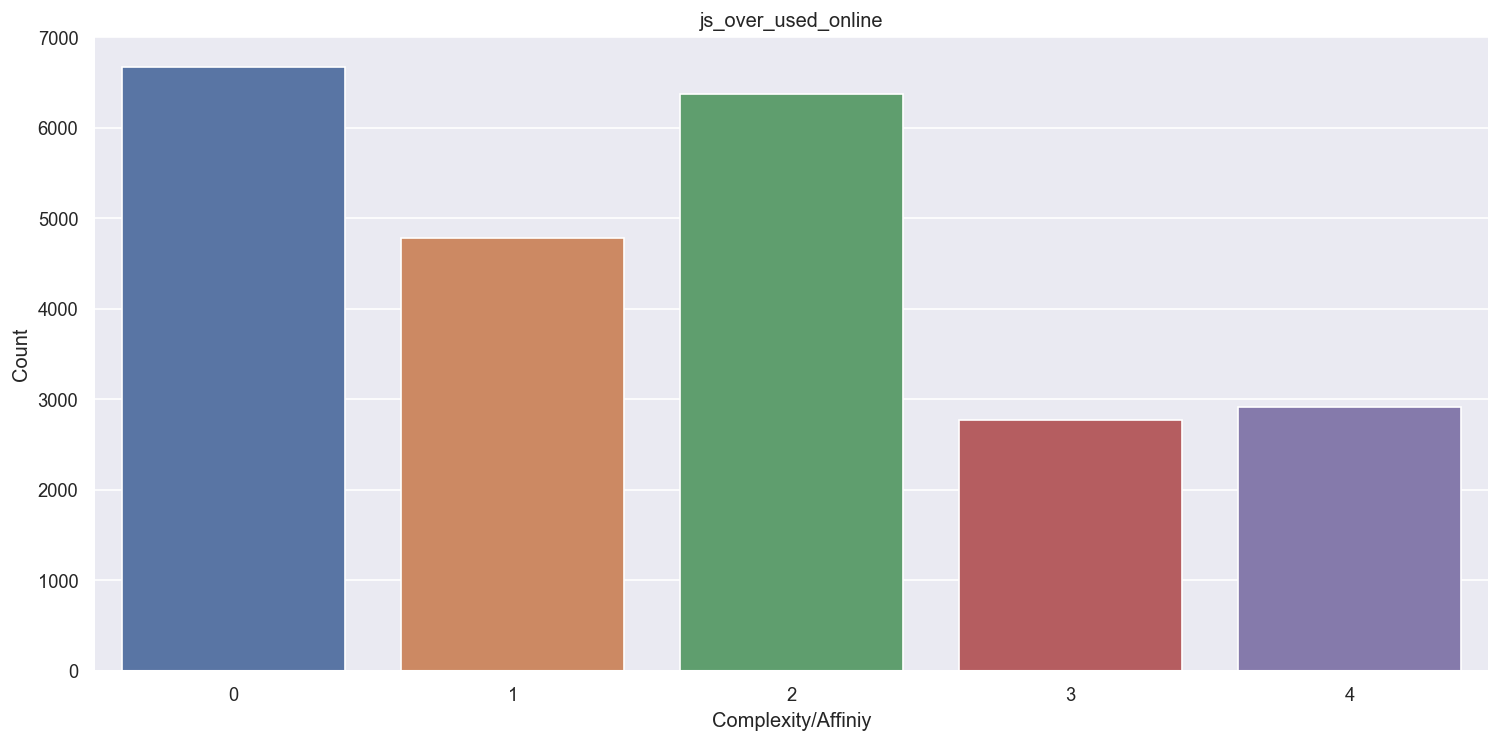

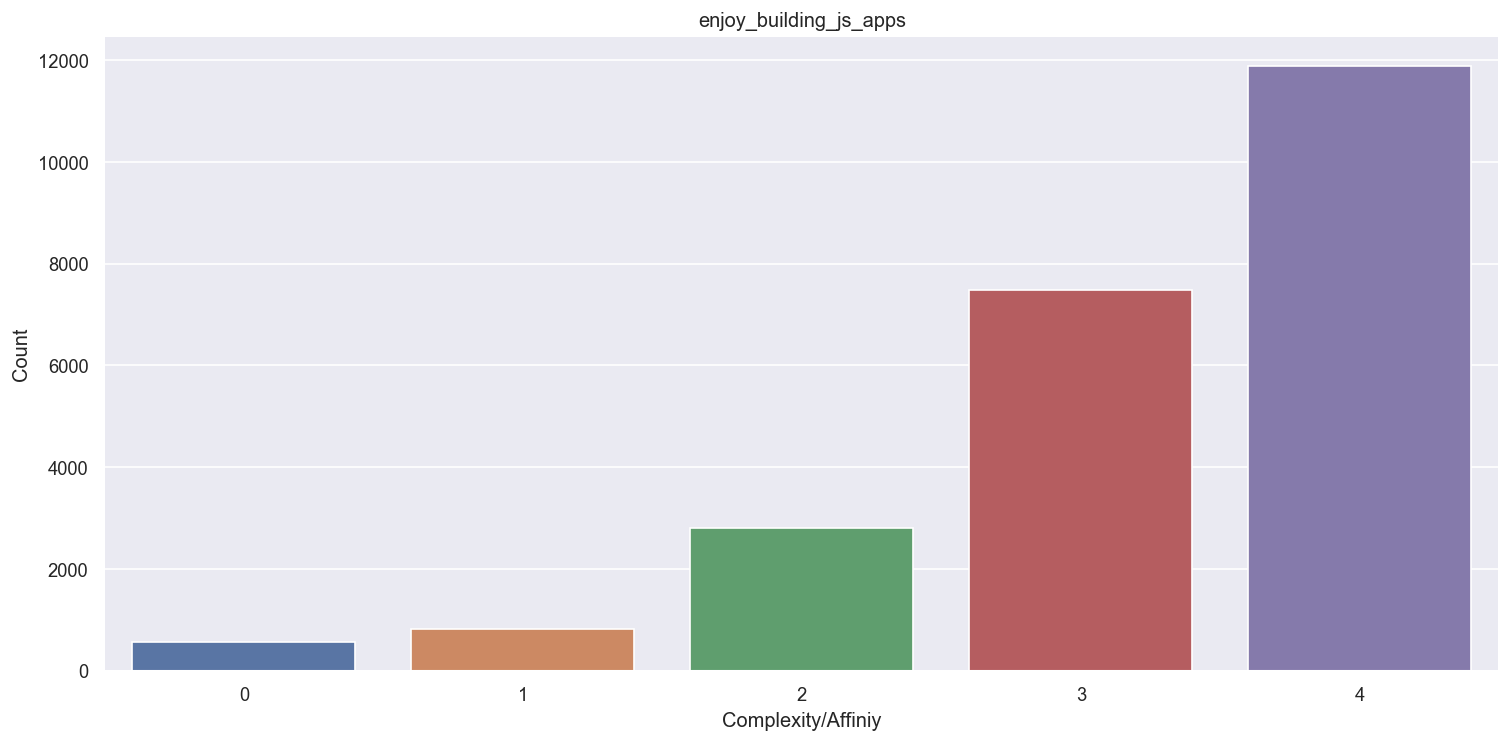

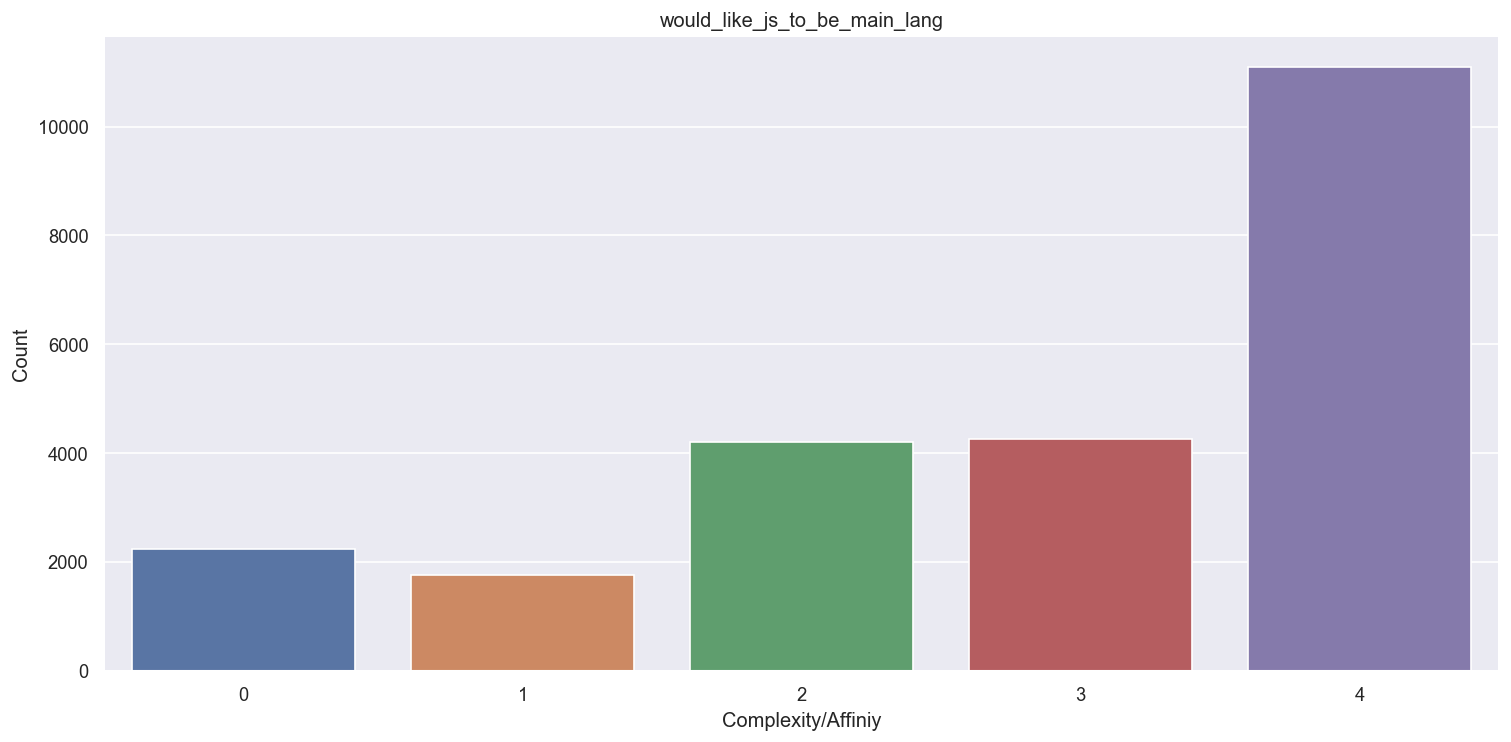

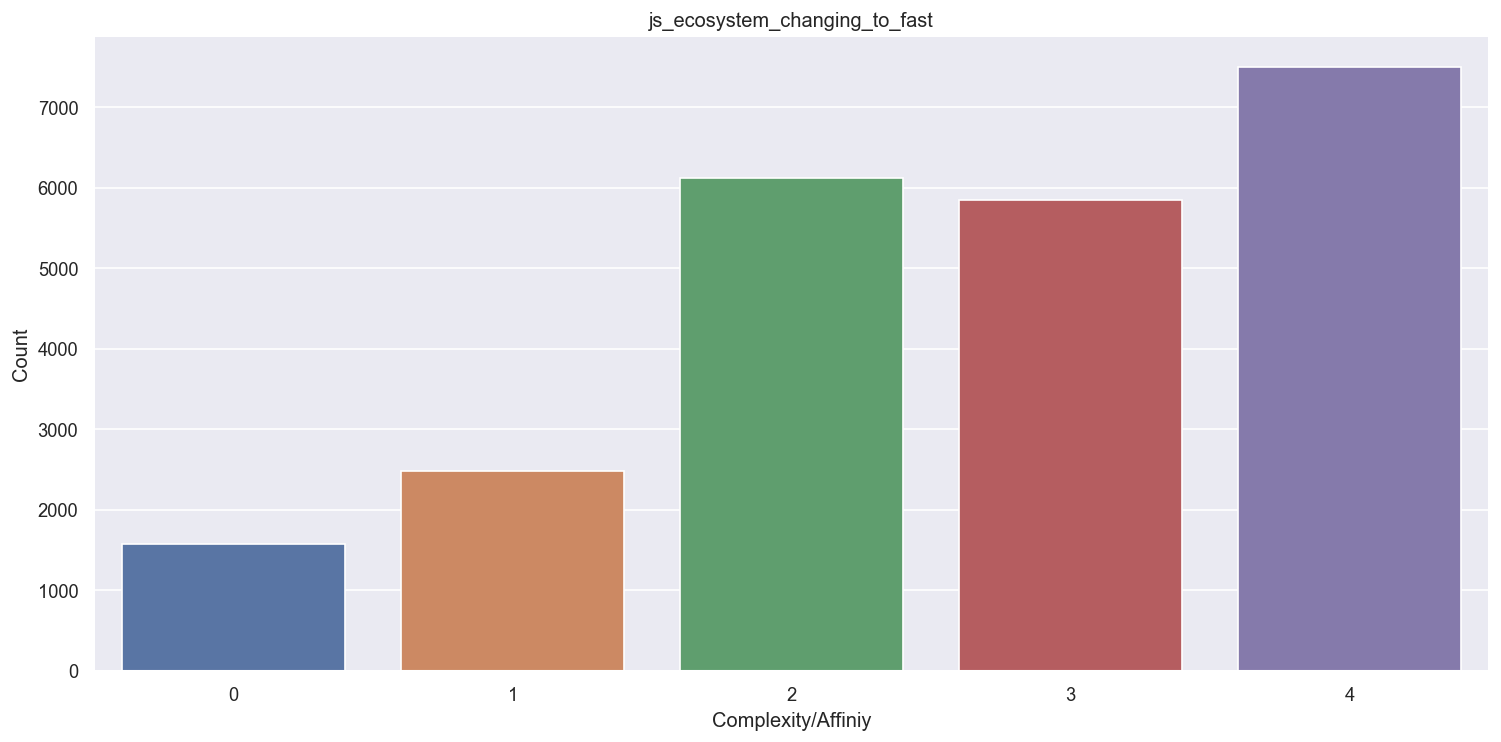

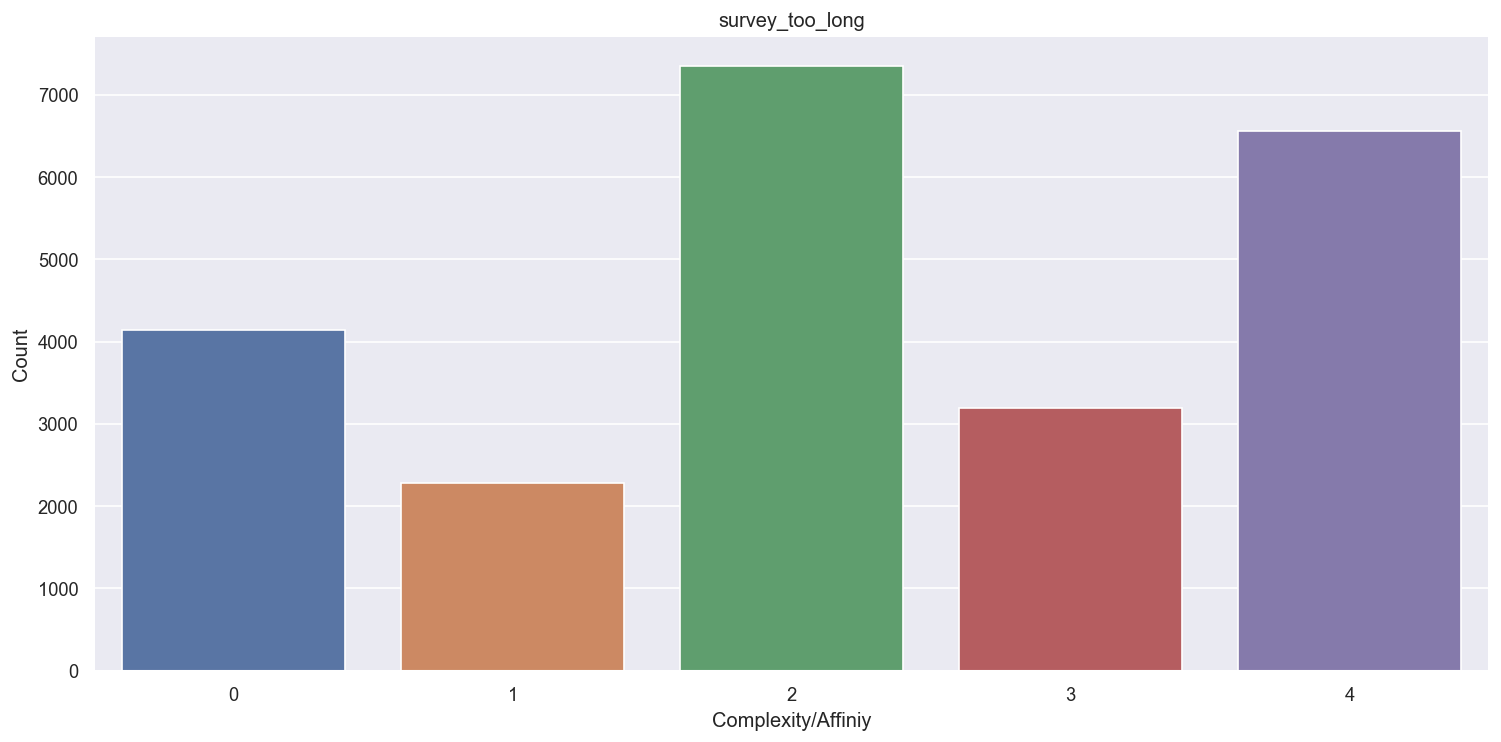

In [58]:
dummy = {}
for i in df.opinions:
    for j in i:
        try:
            dummy[j].append(i[j])
        except:
            dummy[j] = [i[j]]

dum = {}
for i in dummy:
    dum[i] = {}
    dum[i]['Complexity/Affiniy'] = []
    dum[i]['Count'] = []
    for j,k in Counter(dummy[i]).items():
            dum[i]['Complexity/Affiniy'].append(j)
            dum[i]['Count'].append(k)
    dum[i] = pd.DataFrame(dum[i])

Opinions_dict_DF = dum

for i in Opinions_dict_DF:
    f,ax = plt.subplots(1,1,figsize=(15,7),dpi=120)
    ax = sbn.barplot(x='Complexity/Affiniy',y='Count',data=Opinions_dict_DF[i])
    ax.tick_params(axis = 'x', rotation = 0)
    ax.set_title(i)
    plt.show()